Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
airbnb<-read.csv('airbnbueno.csv',sep = ';', stringsAsFactors = T)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
nrow(airbnb)
head(airbnb , 5)


[1] 14780

ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,...,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
14712301,https://www.airbnb.com/rooms/14712301,2.017030e+13,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",none,,...,9,9,10,,,strict,1,0.34,"51.492474020220754,-0.18862840099442768","Host Has Profile Pic,Host Identity Verified"
12884849,https://www.airbnb.com/rooms/12884849,2.017030e+13,2017-03-05,Five bedroom house in Barnes,"Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children.","The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional and spacious bedrooms as well as shared bathroom. All bedrooms including the children's bedrooms have plenty of wardrobe space. House is basic but clean and fully functional.","Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children. The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional",none,Quiet residential street,...,10,10,9,,,moderate,2,0.76,"51.482004616612734,-0.23927746504041247","Host Has Profile Pic,Is Location Exact"
17524980,https://www.airbnb.com/rooms/17524980,2.017030e+13,2017-03-05,"Modern & Bright, Central Soho, 1 Bedroom Apartment","A nice compact one bedroom apartment th

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [3]:
just <- as.vector(c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')) # Storing the columns I want to extract as a vecto                                     
result <- airbnb[,just]     
ncol(result)
nrow(result)
head(result, 5)

[1] 14

[1] 14780

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
library(dplyr)

#Realizamos un subconjunto del dataframe anterior
subset(result,Room.Type=='Entire home/apt') -> df_entire
subset(df_entire,City == 'Madrid') -> df_madrid
df_madrid <- df_madrid %>% filter(Neighbourhood !='')


In [5]:
head(df_madrid, 5)

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
Madrid,Entire home/apt,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
Madrid,Entire home/apt,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
Madrid,Entire home/apt,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
Madrid,Entire home/apt,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
Madrid,Entire home/apt,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322


In [6]:
#A continuación quitamos las columnas que ya no necesitamos porque al estar filtrado son valores idénticos en cada entrada
borrar <- c("Room.Type","City")
df_madrid <- df_madrid[ , !(names(df_madrid) %in% borrar)]
nrow(df_madrid)
head(df_madrid, 5)


[1] 5601

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [7]:
df_madrid$Square.Meters<-df_madrid$Square.Feet*0.092903
head(df_madrid, 5)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [8]:
print("El número de apartamentos con NA en Square.Meters es :")
sum(is.na(df_madrid$Square.Meters))

[1] "El número de apartamentos con NA en Square.Meters es :"


[1] 5254

In [9]:
print("La proporción de pisos sin valor de Metros Cuadrados es: " )
(sum(is.na(df_madrid$Square.Meters)) / length(df_madrid$Square.Meters)*100)

[1] "La proporción de pisos sin valor de Metros Cuadrados es: "


[1] 93.80468

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [10]:
library(dplyr)
# Filtrar el dataframe para quedarnos solo con los apartamentos que tienen un valor de metros cuadrados diferente de NA
df_filt1 <- df_madrid %>% filter(!is.na(Square.Meters))
nrow(df_filt1)
# Contar el número de apartamentos con 0 metros cuadrados
num_apartamentos_0_metros <- sum(df_filt1$Square.Meters == 0)
num_apartamentos_0_metros
# Calcular el porcentaje de apartamentos con 0 metros cuadrados
porcentaje <- num_apartamentos_0_metros / (nrow(df_filt1) )*100
porcentaje
head(df_filt1 , 5)

[1] 347

[1] 128

[1] 36.88761

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
Embajadores,3,1,1,2,75,0,2,9,83,40.41267,-3.704507,0.00000
Sol,5,1,2,5,100,753,2,5,91,40.41609,-3.706012,69.95596
Legazpi,2,1,1,1,32,0,1,0,94,40.38994,-3.693091,0.00000
Cuatro Caminos,9,2,3,8,100,1184,4,10,90,40.45241,-3.699048,109.99715
Cuatro Caminos,4,2,1,1,46,603,2,7,93,40.45021,-3.699102,56.02051


Reemplazar todos los 0m^2 por NA 

In [11]:
df_madrid<-df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters==0, NA, Square.Meters))
table(!is.na(df_madrid$Square.Meters))
#Los valores que el booleano devuelve como verdadero son los que siguen teniendo valor después de los cambios y los filtros aplicados


FALSE  TRUE 
 5382   219 

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”

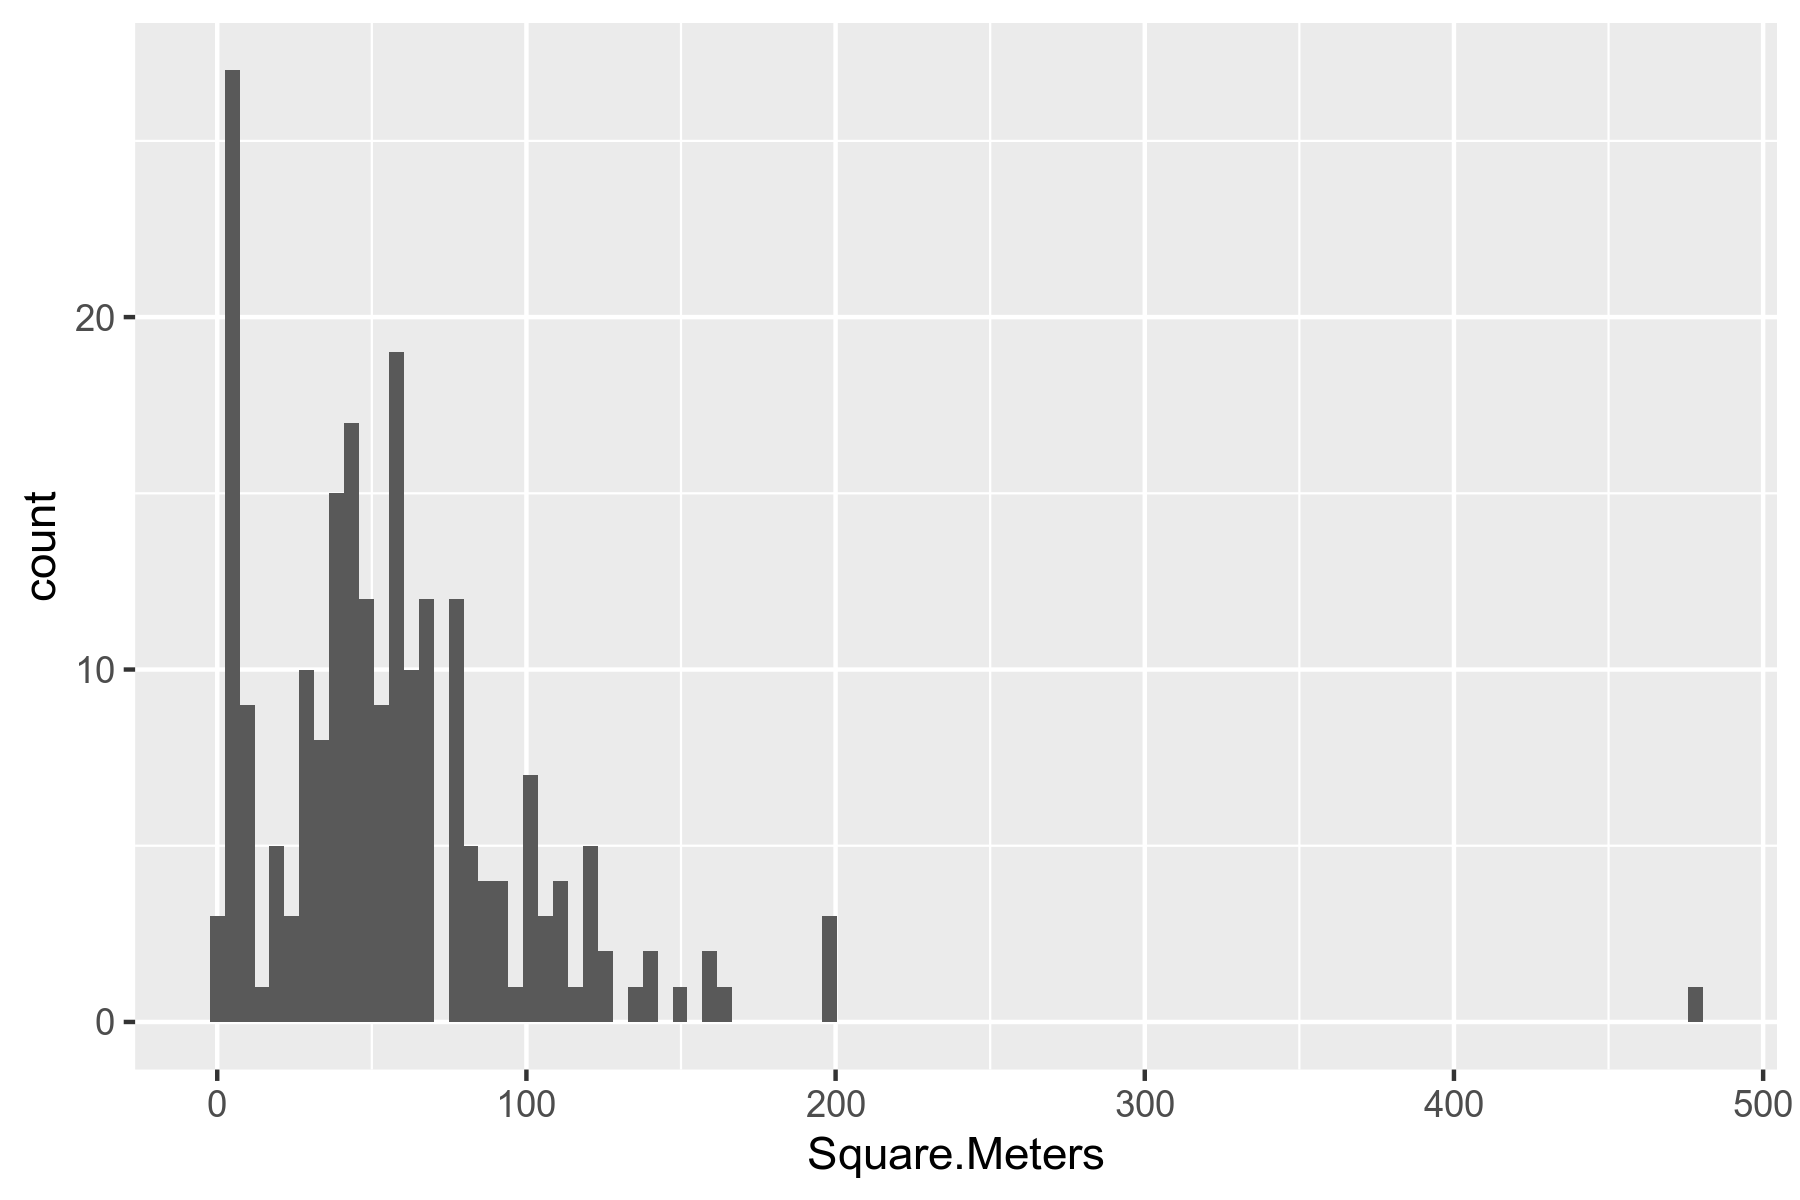

In [12]:
df_madrid %>% ggplot(aes(x=Square.Meters))+geom_histogram(bins=100)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [13]:
df_madrid<-df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters<20, NA, Square.Meters))
sum(is.na(df_madrid$Square.Meters))
table(!is.na(df_madrid$Square.Meters))


[1] 5427


FALSE  TRUE 
 5427   174 

In [14]:
#Del total inicial de 5601 entradas de Madrid con datos nos quedamos con los 174 resultados 
#que tienen valor para Metros Cuadrados distinto de NA

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [15]:
datos <- subset(df_madrid, !is.na(Square.Meters), select = c(Neighbourhood, Square.Meters ))
head(datos$Neighbourhood  , 5)
sum(apply(df_madrid,1,function(x) any(is.na(x))))

[1] Sol            Cuatro Caminos Cuatro Caminos Pacifico       Carabanchel   
391 Levels:  Acacias Acton Adams Morgan Adelfas Agios Nikolaos ... Zilker

[1] 5436

In [16]:

#Número total de barrios en el dataframe df_madrid
length(unique(datos$Neighbourhood))
table(!is.na(datos$Square.Meters))
# Filtrar el dataframe para quedarte solo con los barrios que tengo con valores no todos NA
barrios_na <- df_madrid %>% group_by(Neighbourhood) %>% 
  summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
  filter(num_na==1) %>% select(Neighbourhood)

df_madrid <- df_madrid[!df_madrid$Neighbourhood %in% barrios_na$Neighbourhood,]



[1] 38


TRUE 
 174 

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



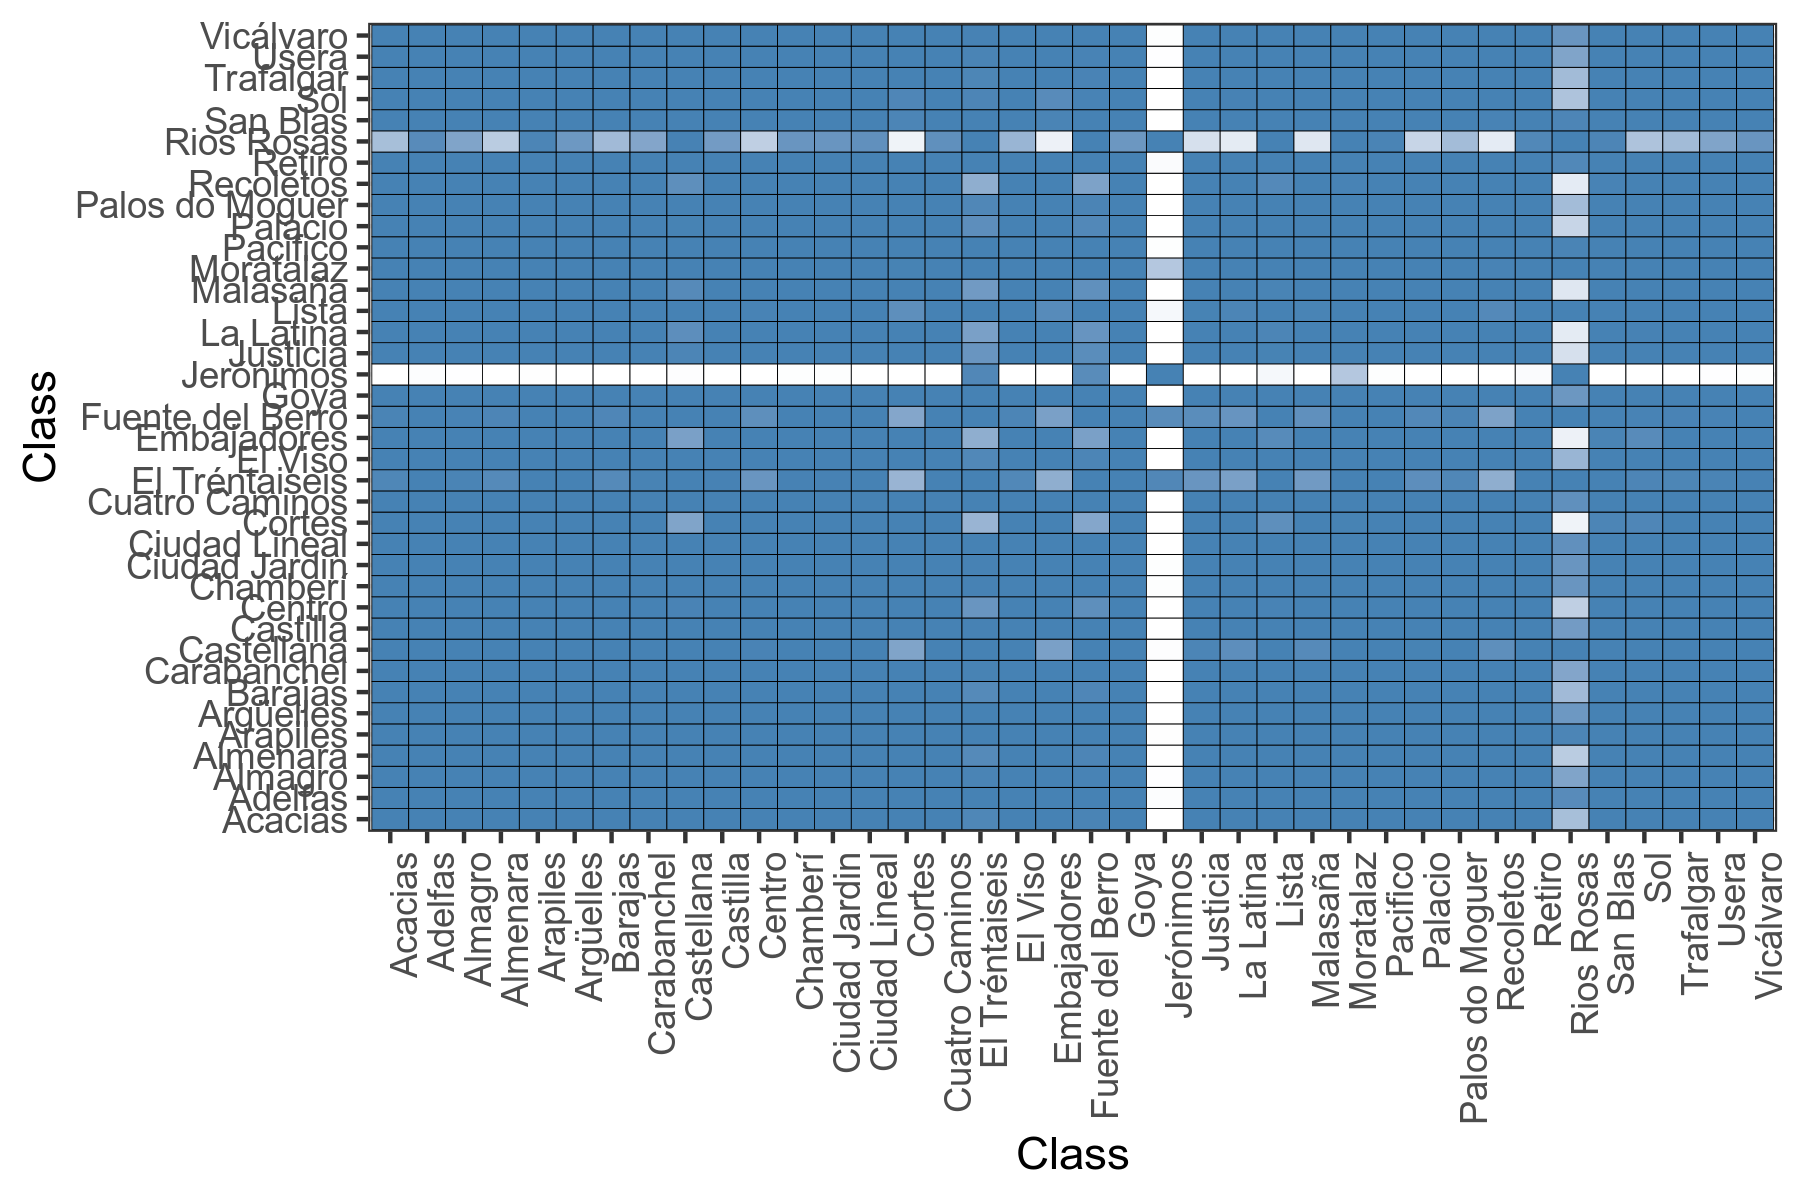

In [17]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [18]:
library(dendextend)



---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:stats’:

    cutree



'dendrogram' with 2 branches and 38 members total, at height 1 

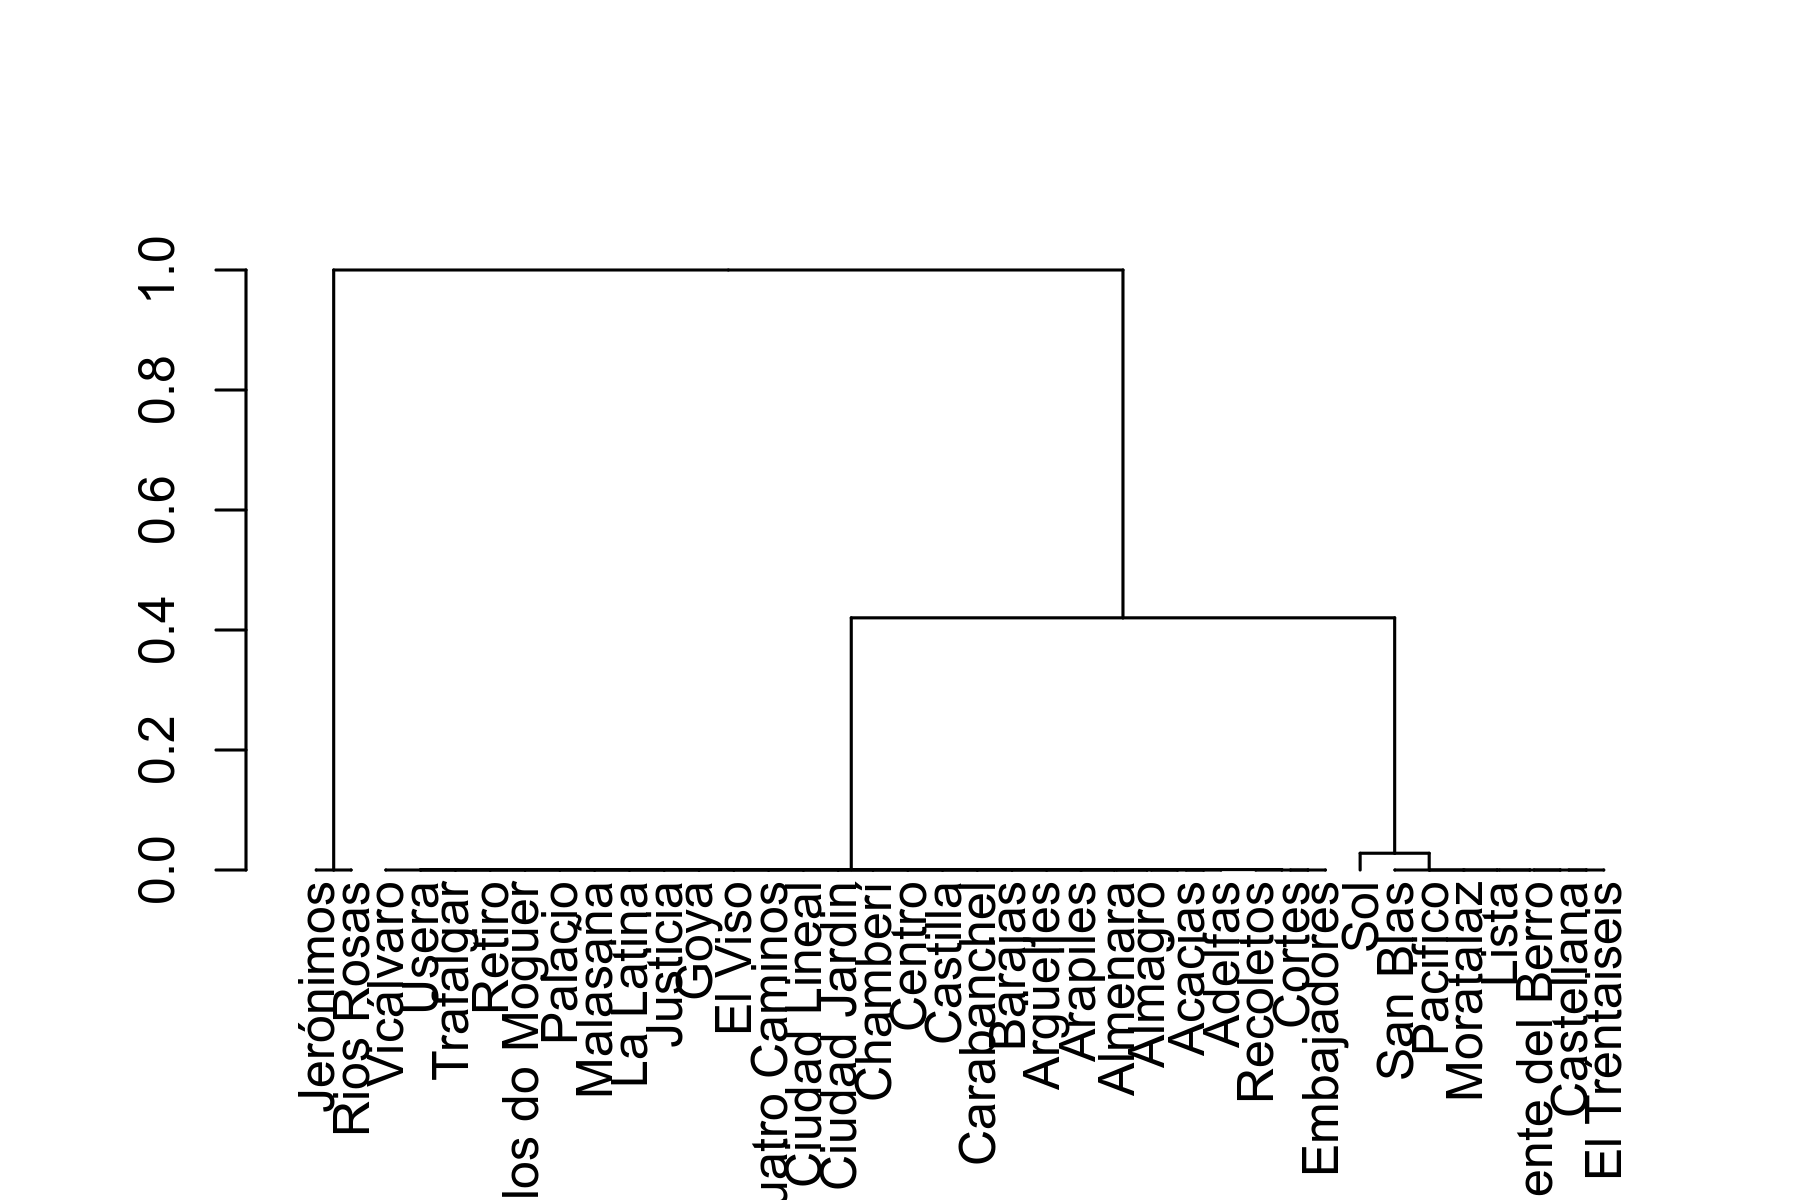

In [19]:
#Uso 1 el absoluto de resm como distancia
mad_tree <- as.dist(1 - resm)
#Genero el conjunto de clústers
mad_cluster <- hclust(mad_tree,method="complete")
#Convierto al dendograma
dendograma <- as.dendrogram(mad_cluster)
dendograma
plot(dendograma )


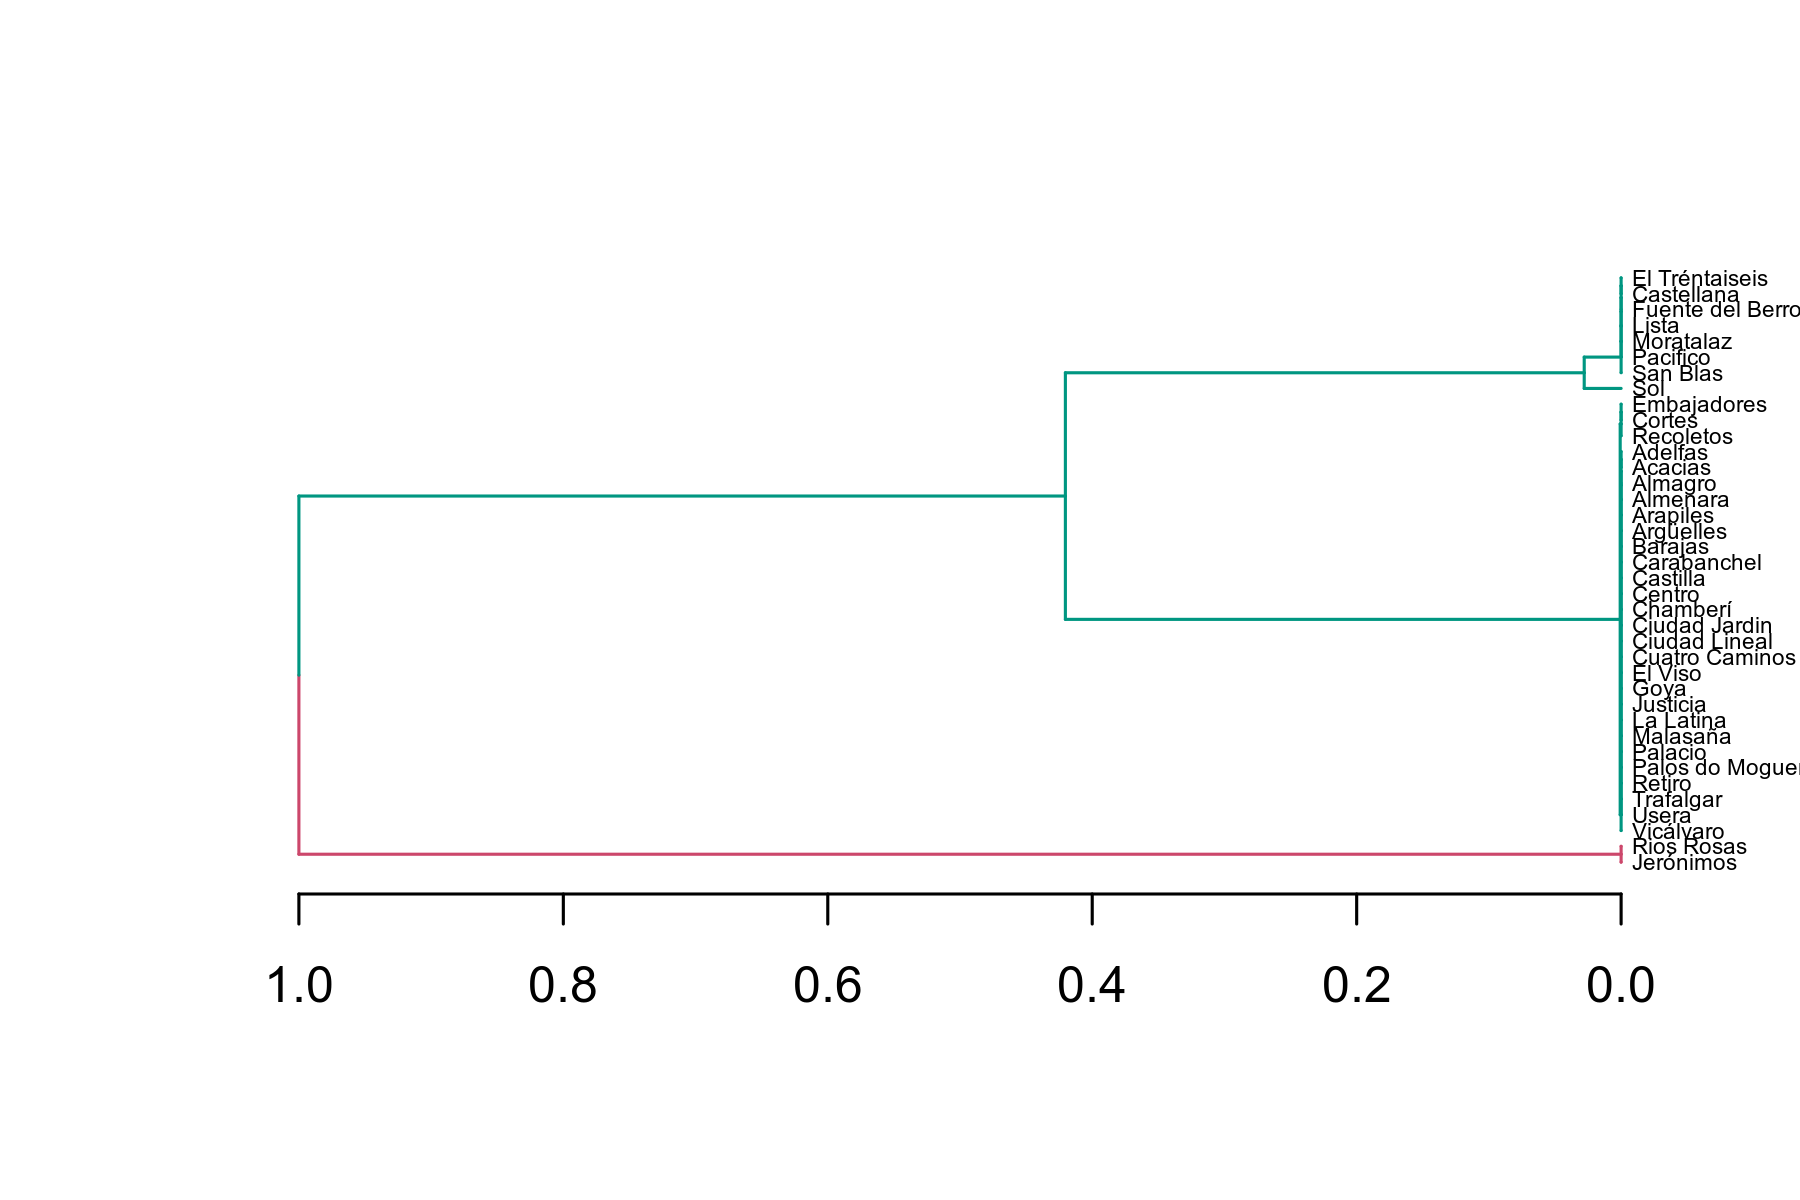

In [20]:
rep <- as.dendrogram(mad_cluster)
rep<-set(rep,"labels_cex", 0.45) 
plot(color_branches(rep,h=0.9),horiz=TRUE)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

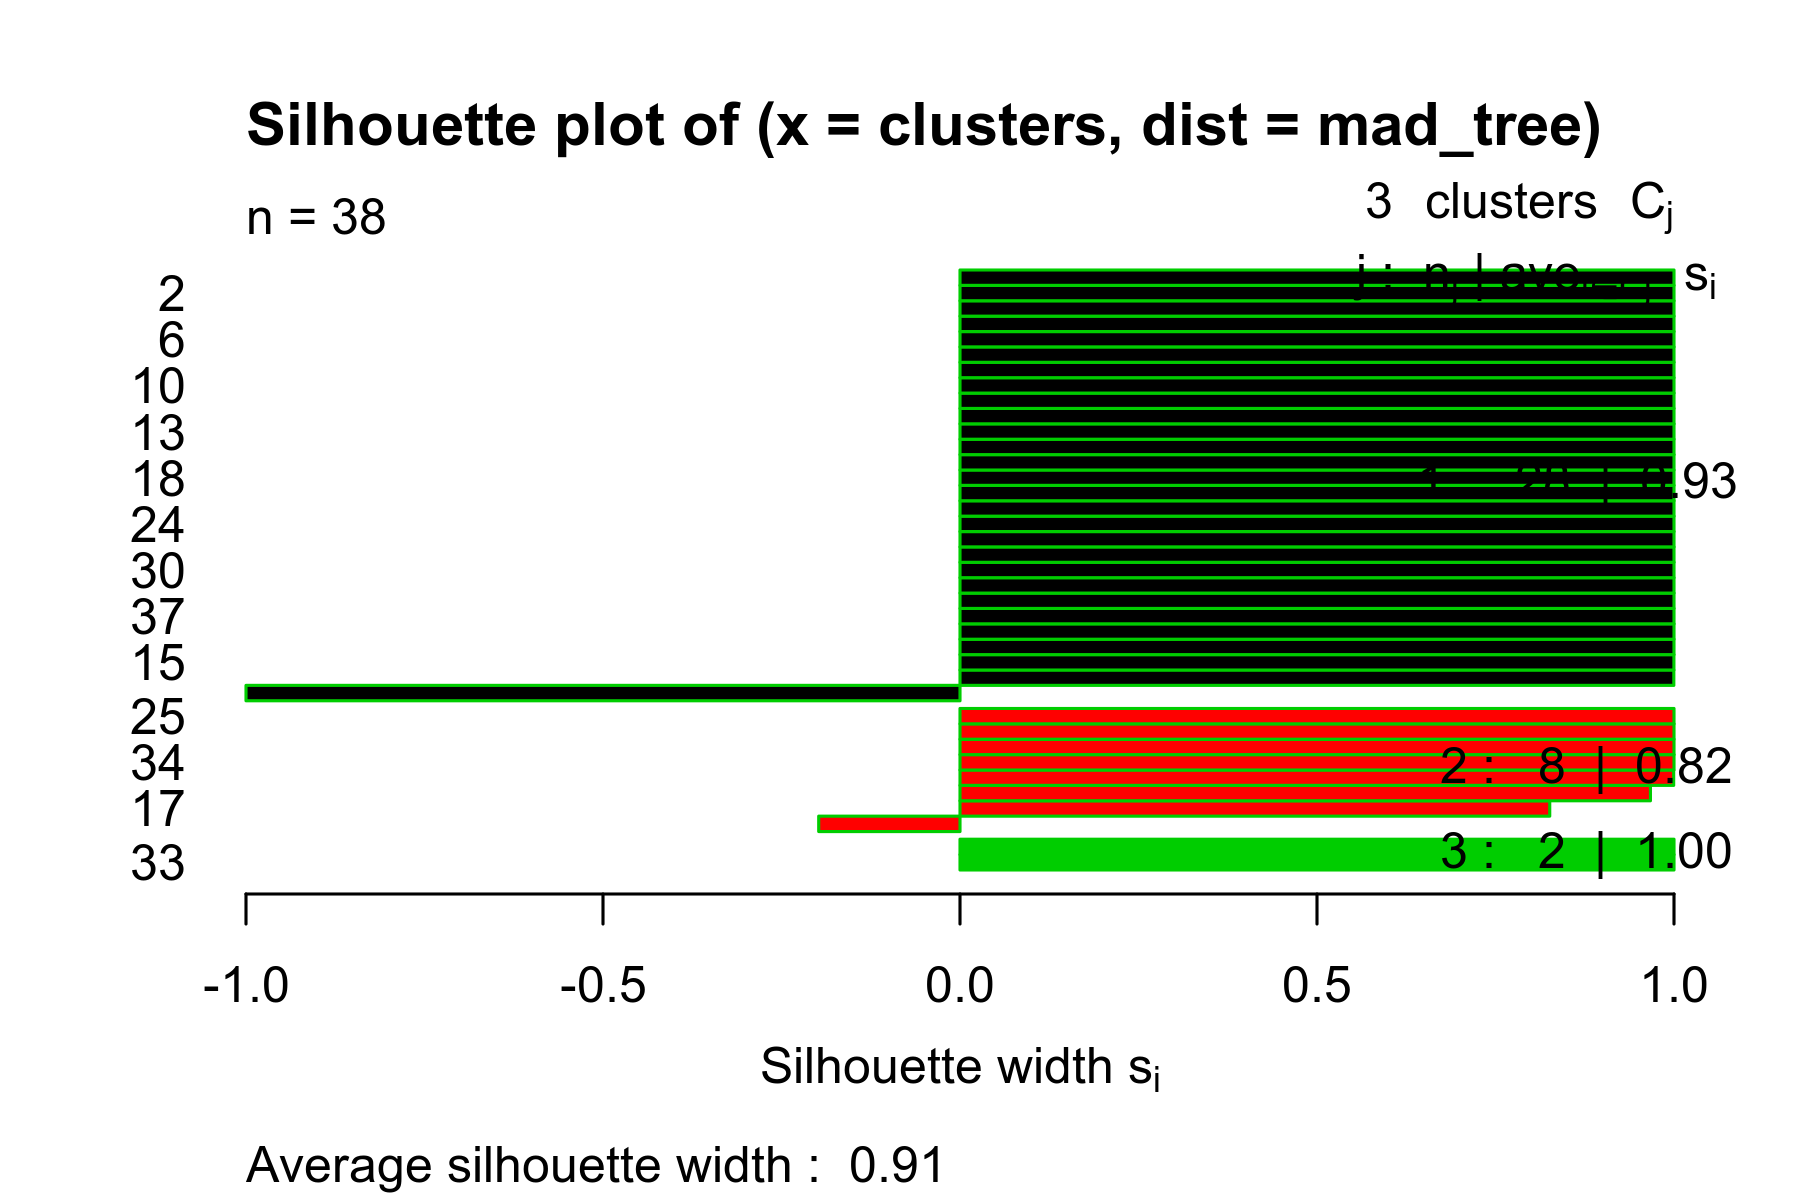

In [21]:
#Usamos silhouette para ver los datos de los clústeres  
library(cluster)
clusters <- cutree(dendograma , k= 3)
ss <- silhouette(clusters , mad_tree)
plot(ss , col=1:max(clusters), border=27)

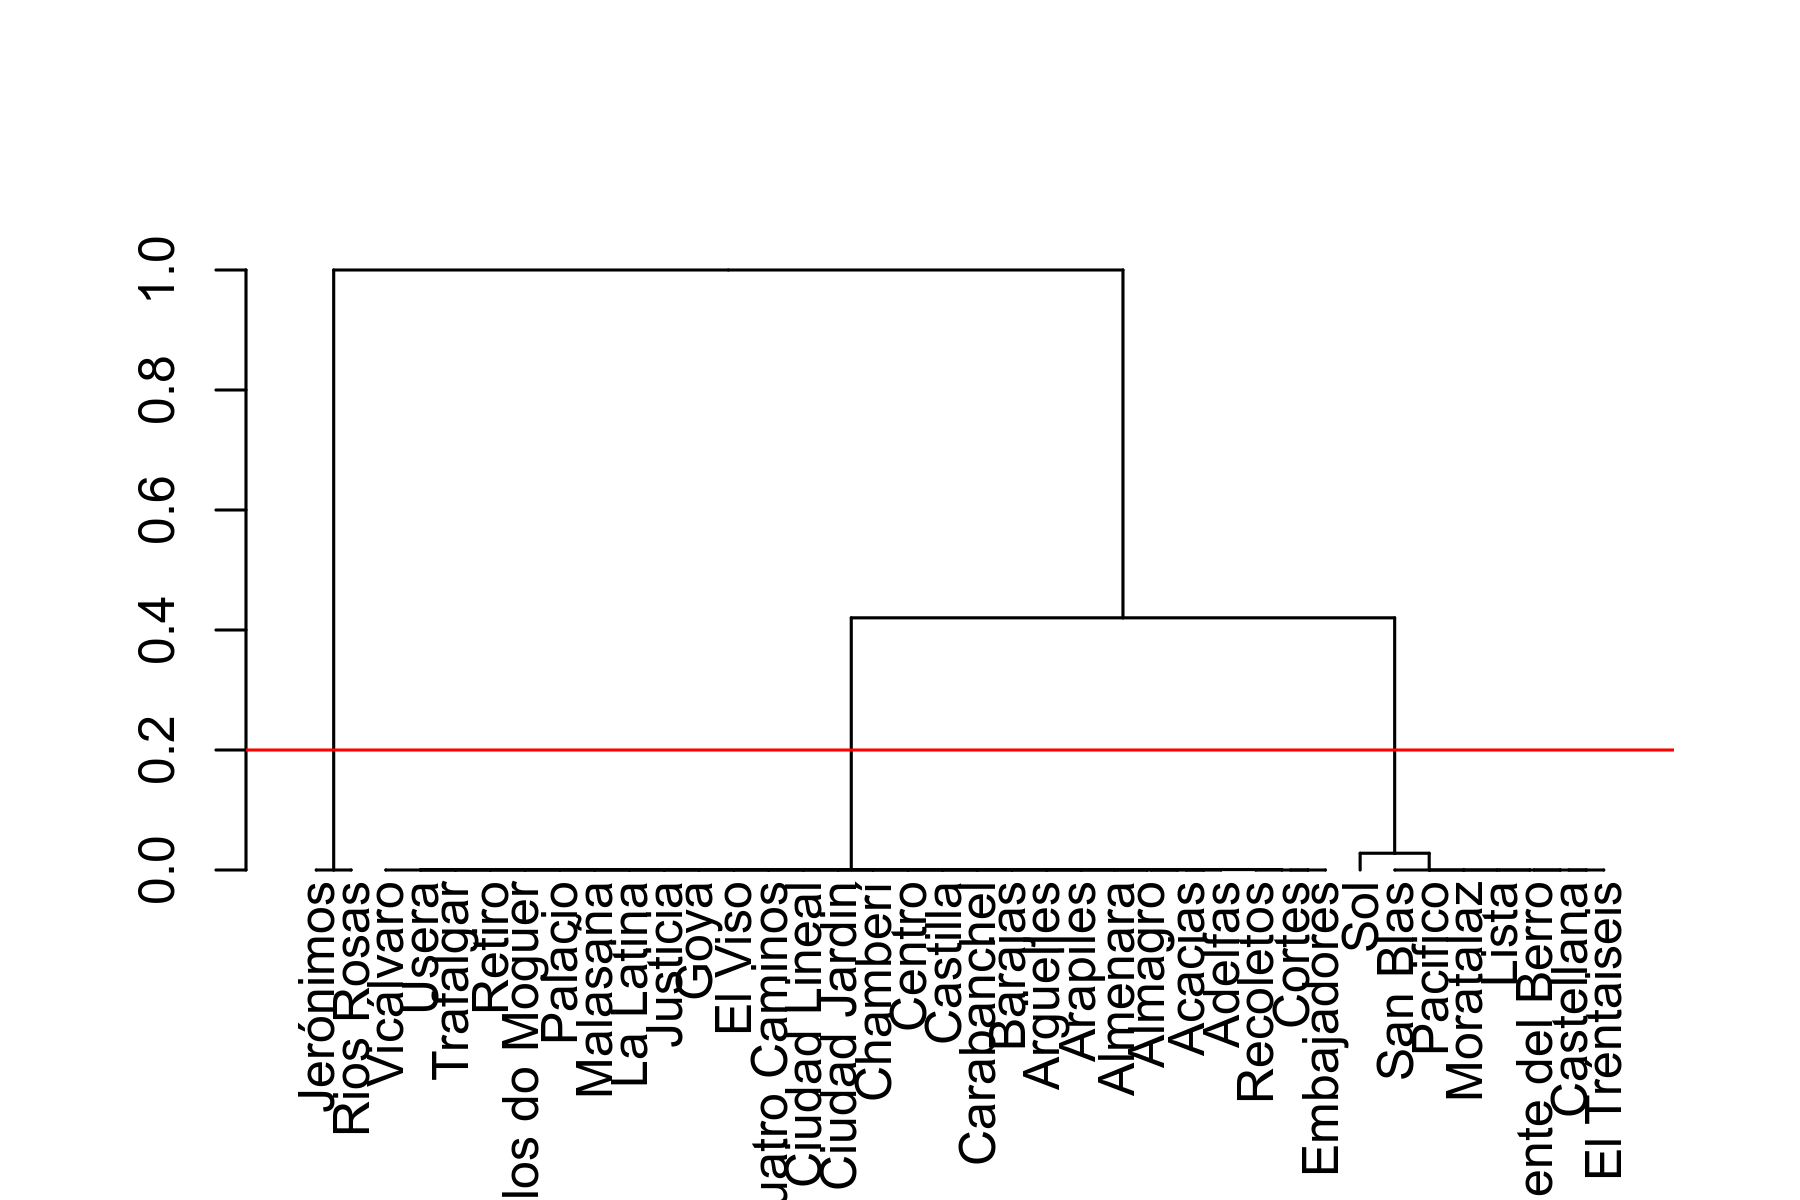

In [22]:
plot(dendograma , cex=0.1 )
abline(h=0.2, col="red")
#El punto aconsejable parece ser aproximadamente a 0.2 de modo que aparecen 3 clústeres diferenciados
ct<-cutree(mad_cluster,h=0.2)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [23]:
df_barrios<-data.frame(names=names(ct),neighbourhood_id=paste0("Neighbourhood_id_",ct))
head(df_barrios)

names,neighbourhood_id
Acacias,Neighbourhood_id_1
Adelfas,Neighbourhood_id_1
Almagro,Neighbourhood_id_1
Almenara,Neighbourhood_id_1
Arapiles,Neighbourhood_id_1
Argüelles,Neighbourhood_id_1


In [24]:
df_madrid_id <- df_madrid %>% 
    inner_join(df_barrios,by=c("Neighbourhood"='names')) %>% filter(!is.na(Square.Meters))

Warning message:
“Column `Neighbourhood`/`names` joining factors with different levels, coercing to character vector”

In [25]:
#Compruebo dimensiones y una muestra del dataframe finalmente filtrado y limpio
dim(df_madrid_id) 
head(df_madrid_id)

[1] 174  14

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighbourhood_id
Sol,5,1,2,5,100,753,2,5,91,40.41609,-3.706012,69.95596,Neighbourhood_id_2
Cuatro Caminos,9,2,3,8,100,1184,4,10,90,40.45241,-3.699048,109.99715,Neighbourhood_id_1
Cuatro Caminos,4,2,1,1,46,603,2,7,93,40.45021,-3.699102,56.02051,Neighbourhood_id_1
Pacifico,4,1,2,3,77,1184,2,15,95,40.40392,-3.681469,109.99715,Neighbourhood_id_2
Carabanchel,6,1,3,4,85,1076,2,0,88,40.37987,-3.732151,99.96363,Neighbourhood_id_1
La Latina,4,1,2,2,115,700,2,0,89,40.41291,-3.706860,65.03210,Neighbourhood_id_1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [26]:
set.seed(12)
idx<-sample(1:nrow(df_madrid_id),nrow(df_madrid_id)*0.8)
df_madrid_id_train<-df_madrid_id[idx,]
df_madrid_id_test<-df_madrid_id[-idx,]

In [27]:
#El modelo escogido es el que más se ajusta a la hora de concretar los parámetros relevantes
model<-lm(formula=Square.Meters~neighbourhood_id+neighbourhood_id+Price+Bedrooms, df_madrid_id_train)
summary(model)


Call:
lm(formula = Square.Meters ~ neighbourhood_id + neighbourhood_id + 
    Price + Bedrooms, data = df_madrid_id_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-145.485  -11.827   -0.556    9.605  145.485 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         17.64643    4.33758   4.068 8.10e-05 ***
neighbourhood_idNeighbourhood_id_2   6.96806    5.72579   1.217   0.2258    
neighbourhood_idNeighbourhood_id_3 159.33877   19.67271   8.099 3.23e-13 ***
Price                                0.09182    0.03699   2.482   0.0143 *  
Bedrooms                            24.80932    2.68110   9.253 5.10e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.67 on 132 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.6985,	Adjusted R-squared:  0.6894 
F-statistic: 76.46 on 4 and 132 DF,  p-value: < 2.2e-16


In [28]:
#Compruebo en train y test para ver si hay overfitting
caret::postResample(predict(model,df_madrid_id_train),obs = df_madrid_id_train$Square.Meters)
caret::postResample(predict(model,df_madrid_id_test),obs = df_madrid_id_test$Square.Meters)

RMSE   Rsquared        MAE 
26.1806410  0.6985312 16.4428175

RMSE   Rsquared        MAE 
27.4047115  0.6229109 20.0625318

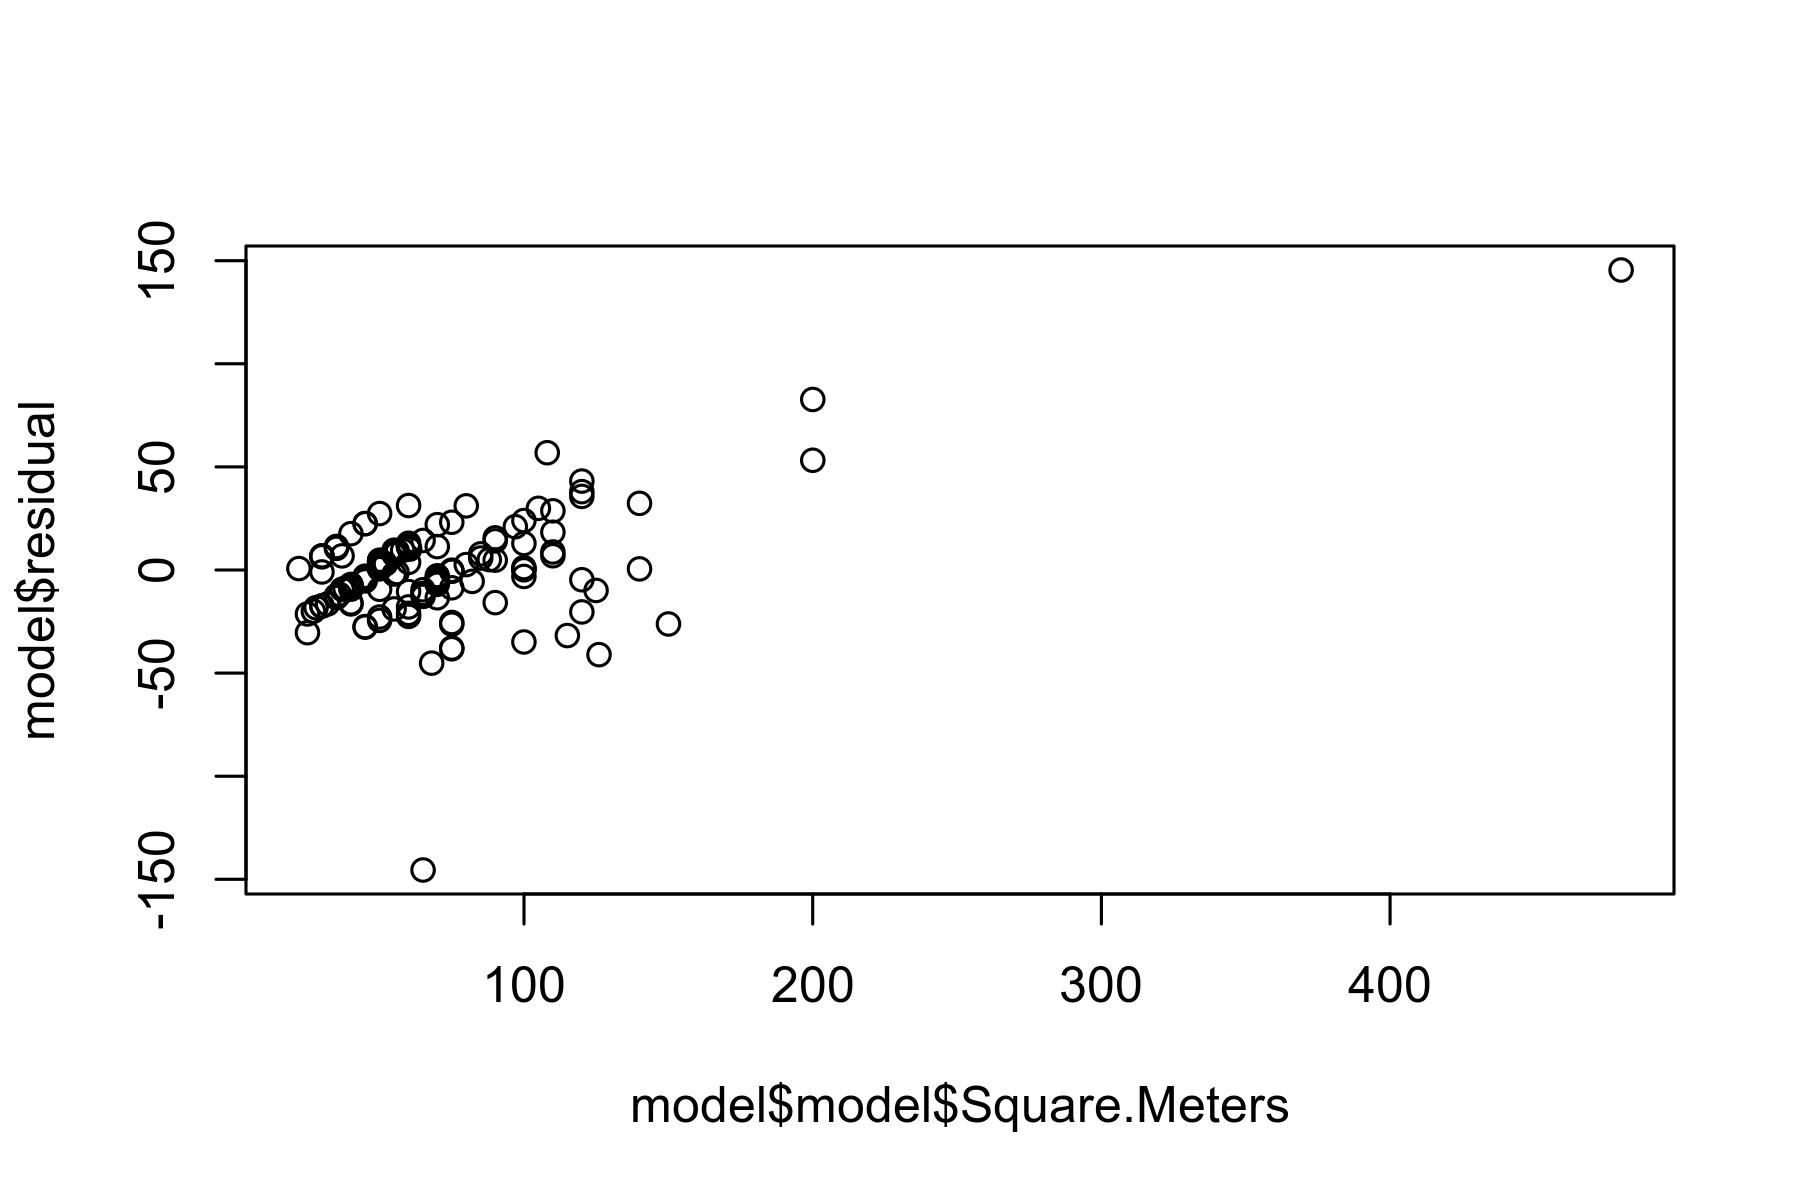

In [29]:
plot(model$model$Square.Meters,model$residual)

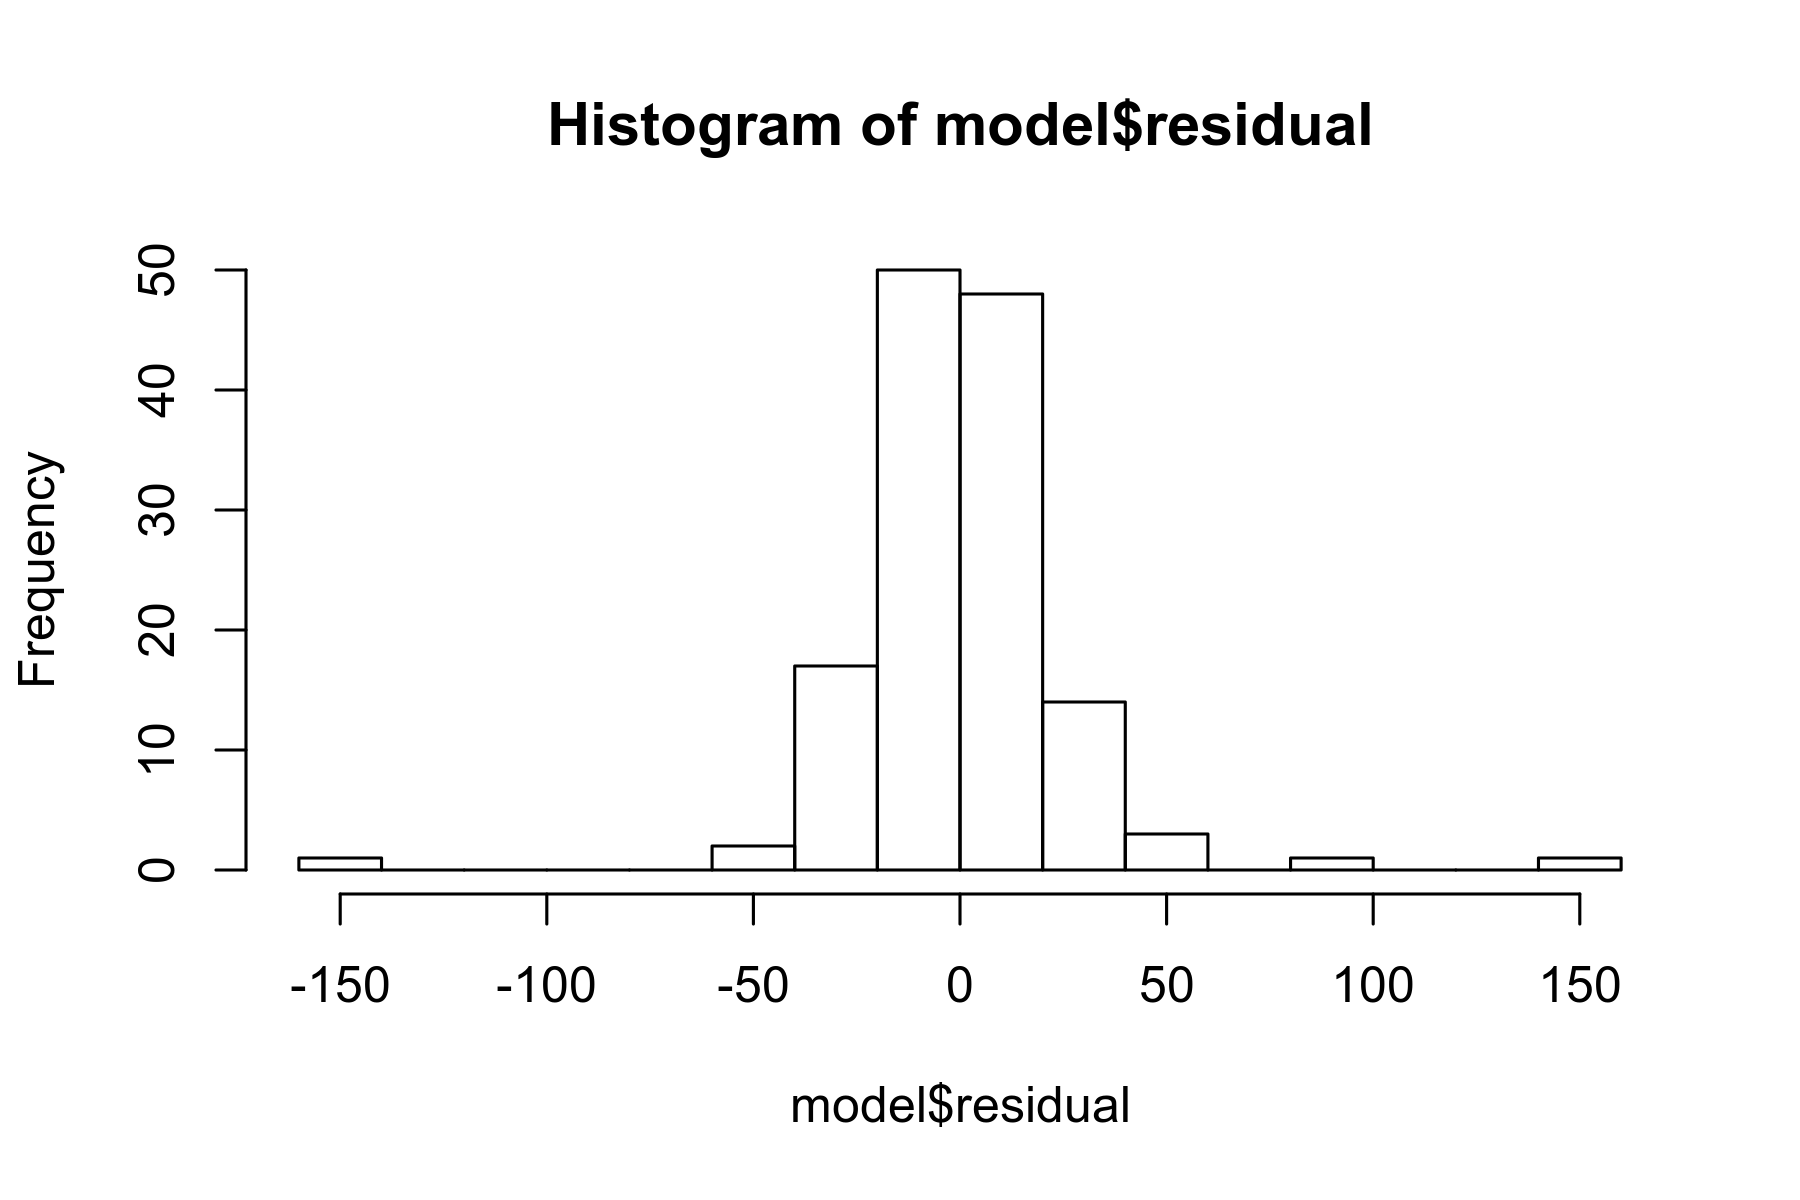

In [30]:
hist(model$residual,breaks=20)

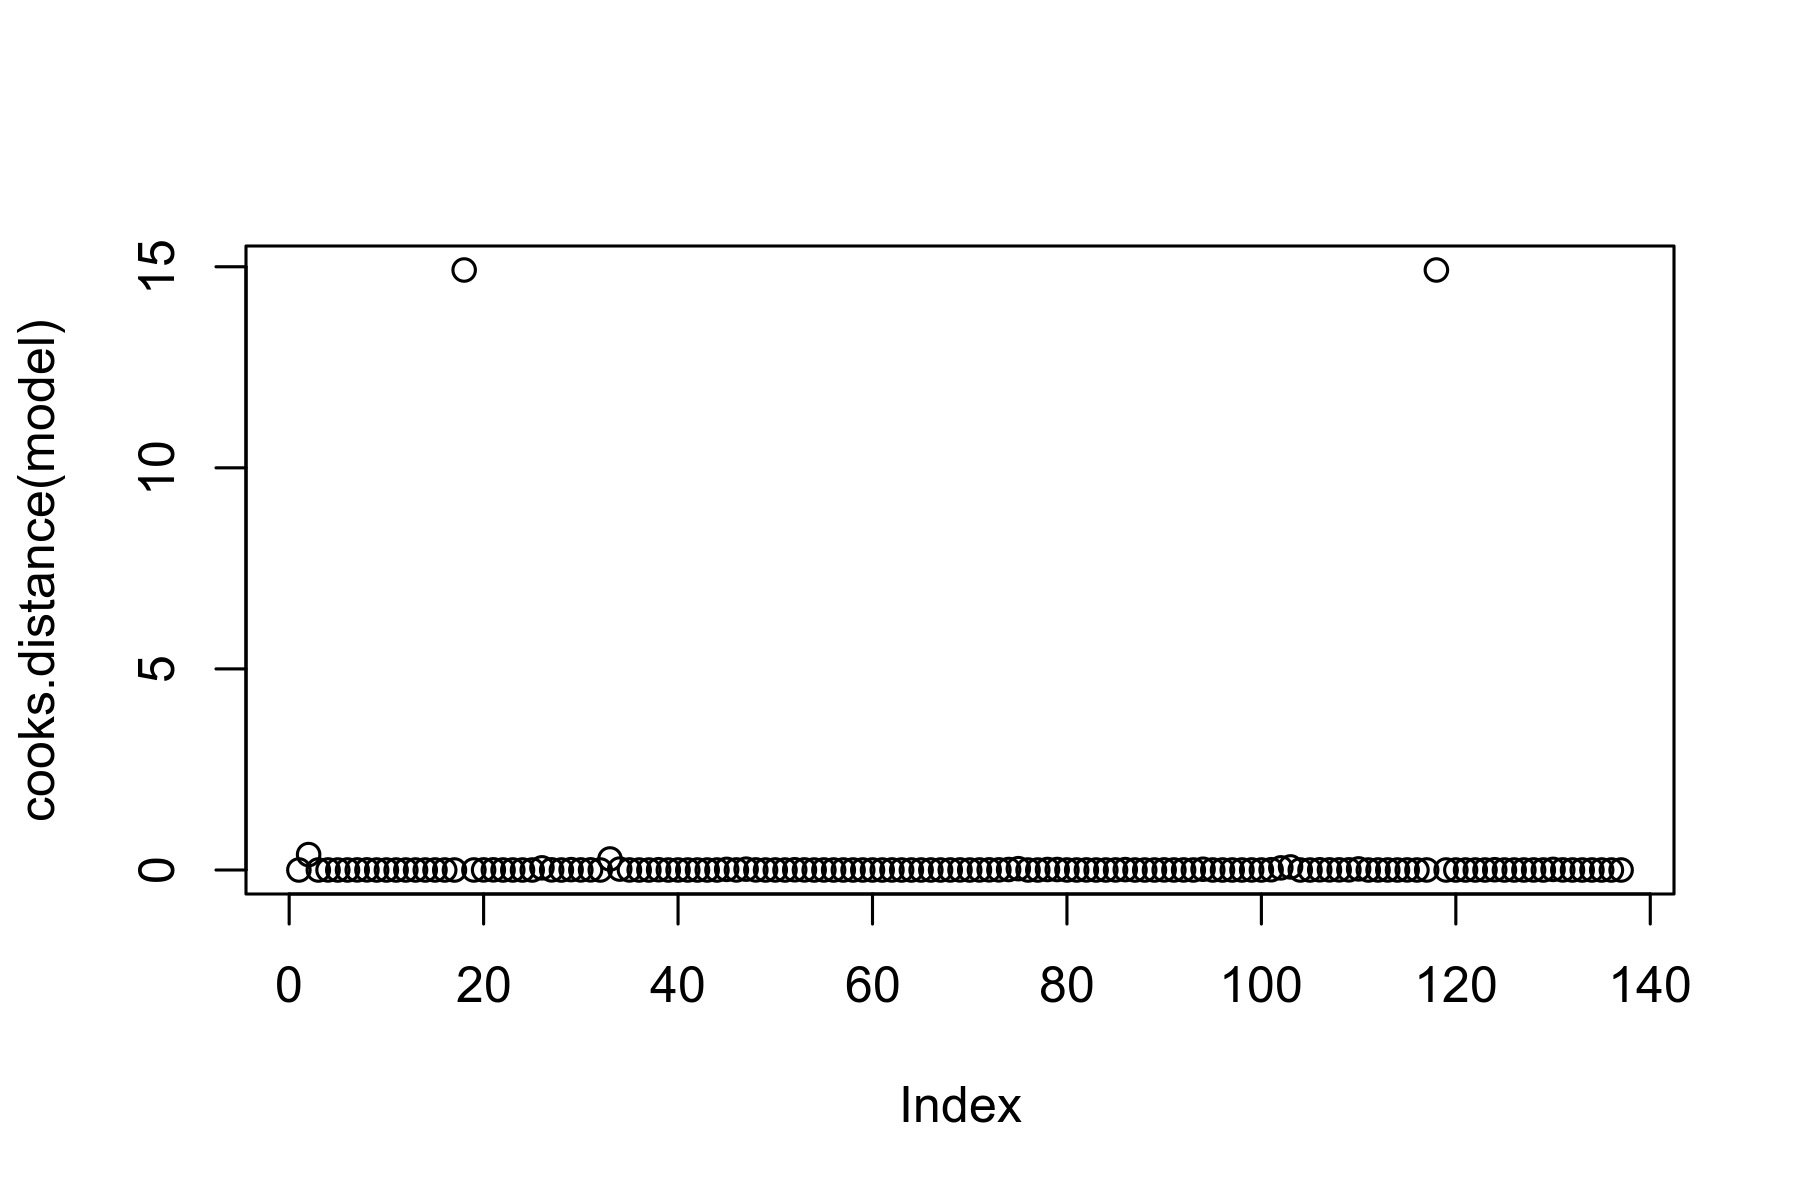

In [31]:
plot(cooks.distance(model))

In [32]:
cook_d<-cooks.distance(model)
df_madrid_id_train[names(which(cook_d>0.2)),]

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighbourhood_id
80,Justicia,6,1,2,6,500,732,4,15,93,40.42051,-3.699712,68.00500,Neighbourhood_id_1
127,Jerónimos,16,5,5,13,365,5167,5,37,98,40.41826,-3.690208,480.02980,Neighbourhood_id_3
48,Cortes,6,2,2,4,500,807,4,15,96,40.41364,-3.697923,74.97272,Neighbourhood_id_1
126,Jerónimos,4,2,1,2,95,700,2,15,91,40.41301,-3.689135,65.03210,Neighbourhood_id_3


In [33]:
head(cook_d)

90           80           91           69           34          136 
1.780219e-04 3.836389e-01 5.334432e-05 1.606394e-03 3.810382e-05 5.624639e-04

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

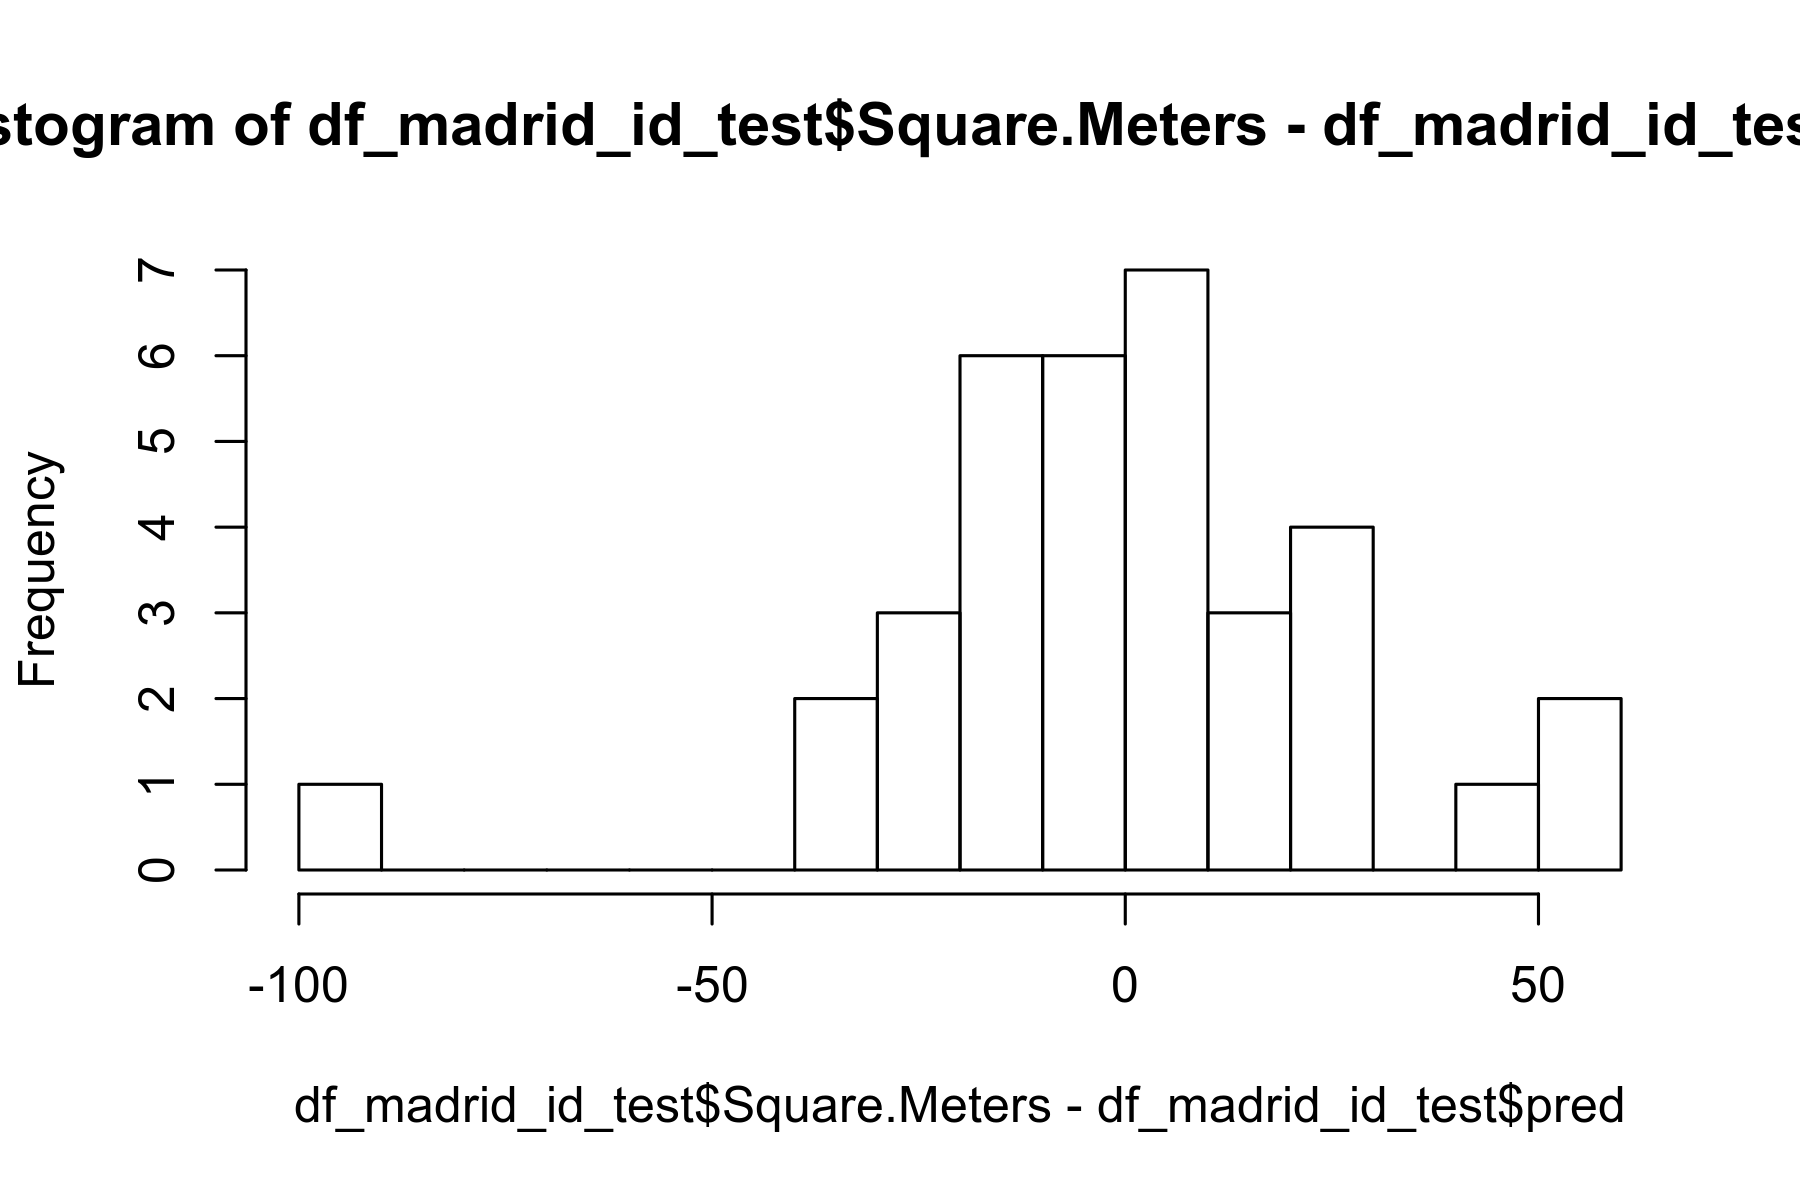

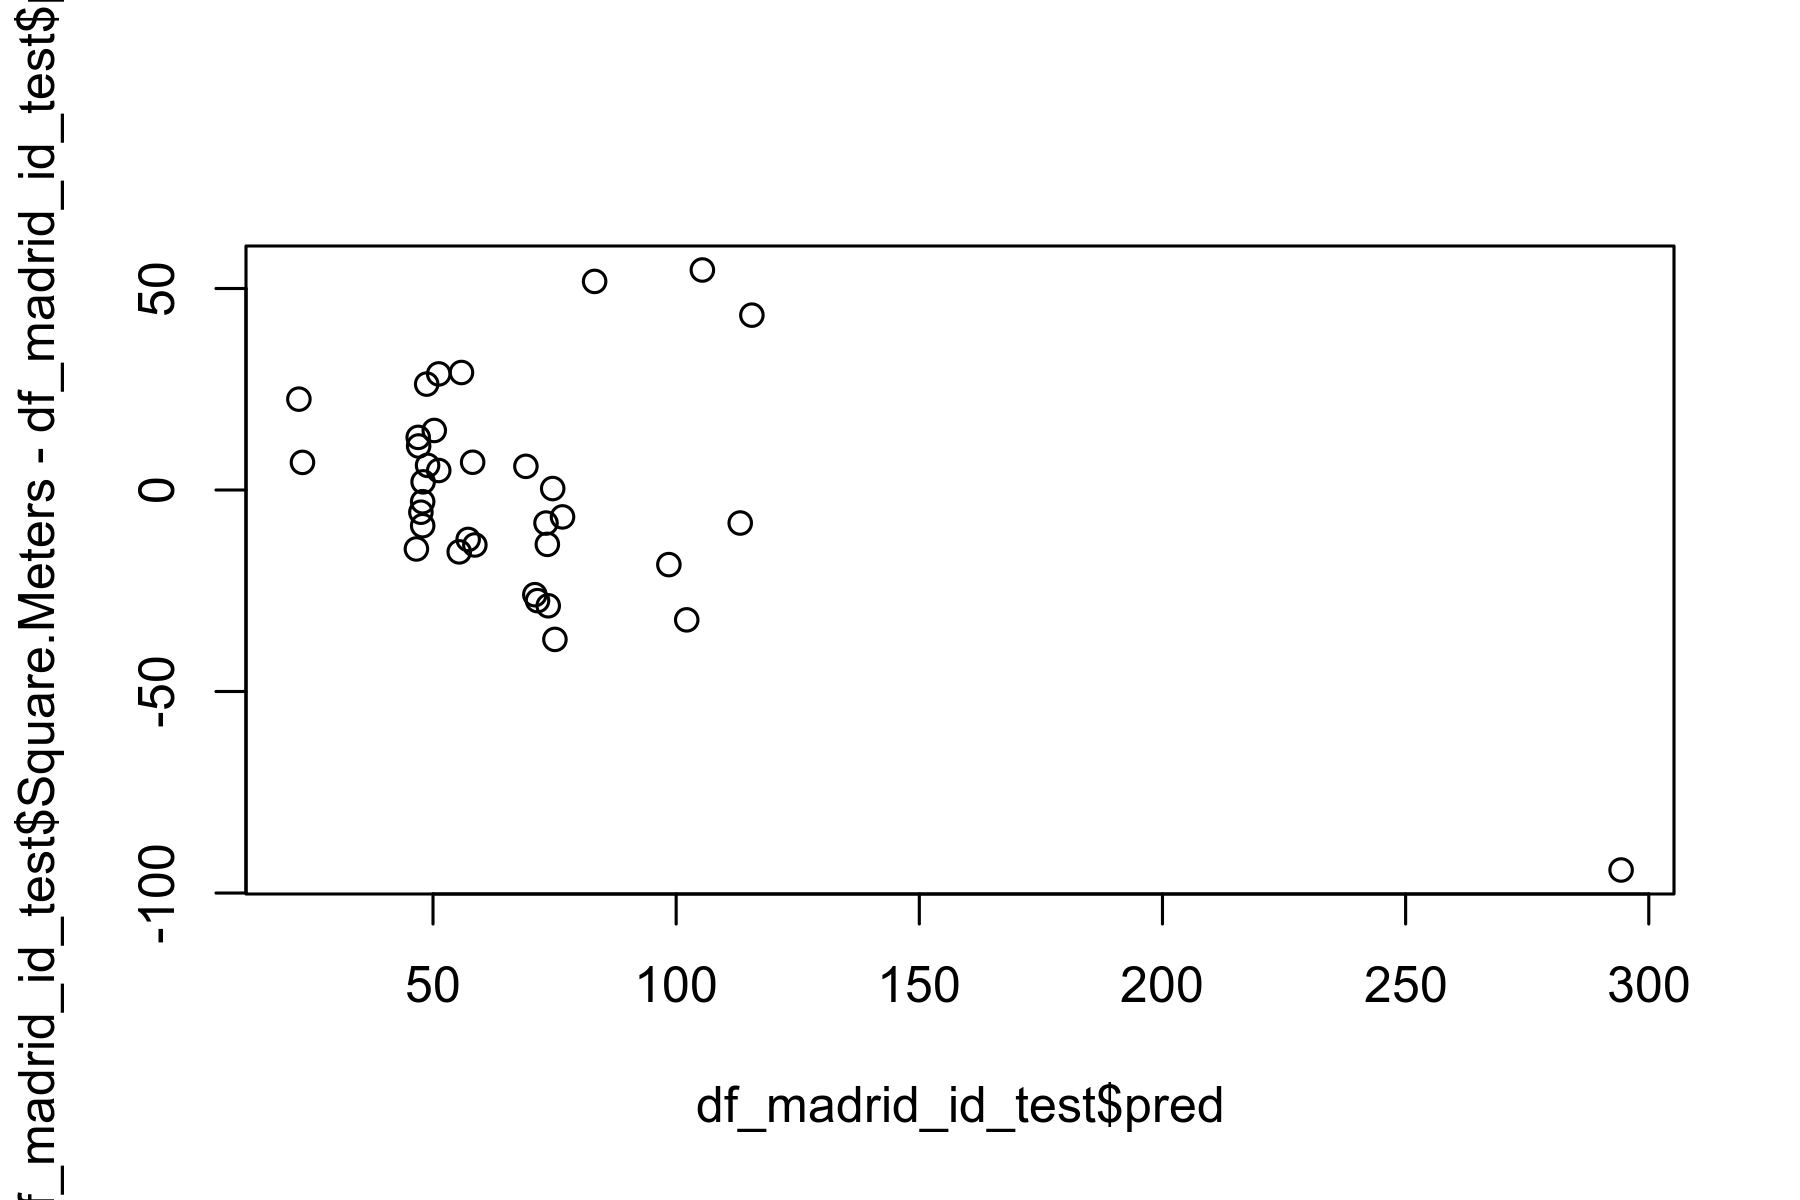

In [34]:
df_madrid_id_test$pred<-model %>% predict(df_madrid_id_test)
hist(df_madrid_id_test$Square.Meters-df_madrid_id_test$pred,breaks=15)
plot(df_madrid_id_test$pred,df_madrid_id_test$Square.Meters-df_madrid_id_test$pred)

In [35]:
library(caret)
postResample(df_madrid_id_test$pred,obs = df_madrid_id_test$Square.Meters)

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



RMSE   Rsquared        MAE 
27.4047115  0.6229109 20.0625318

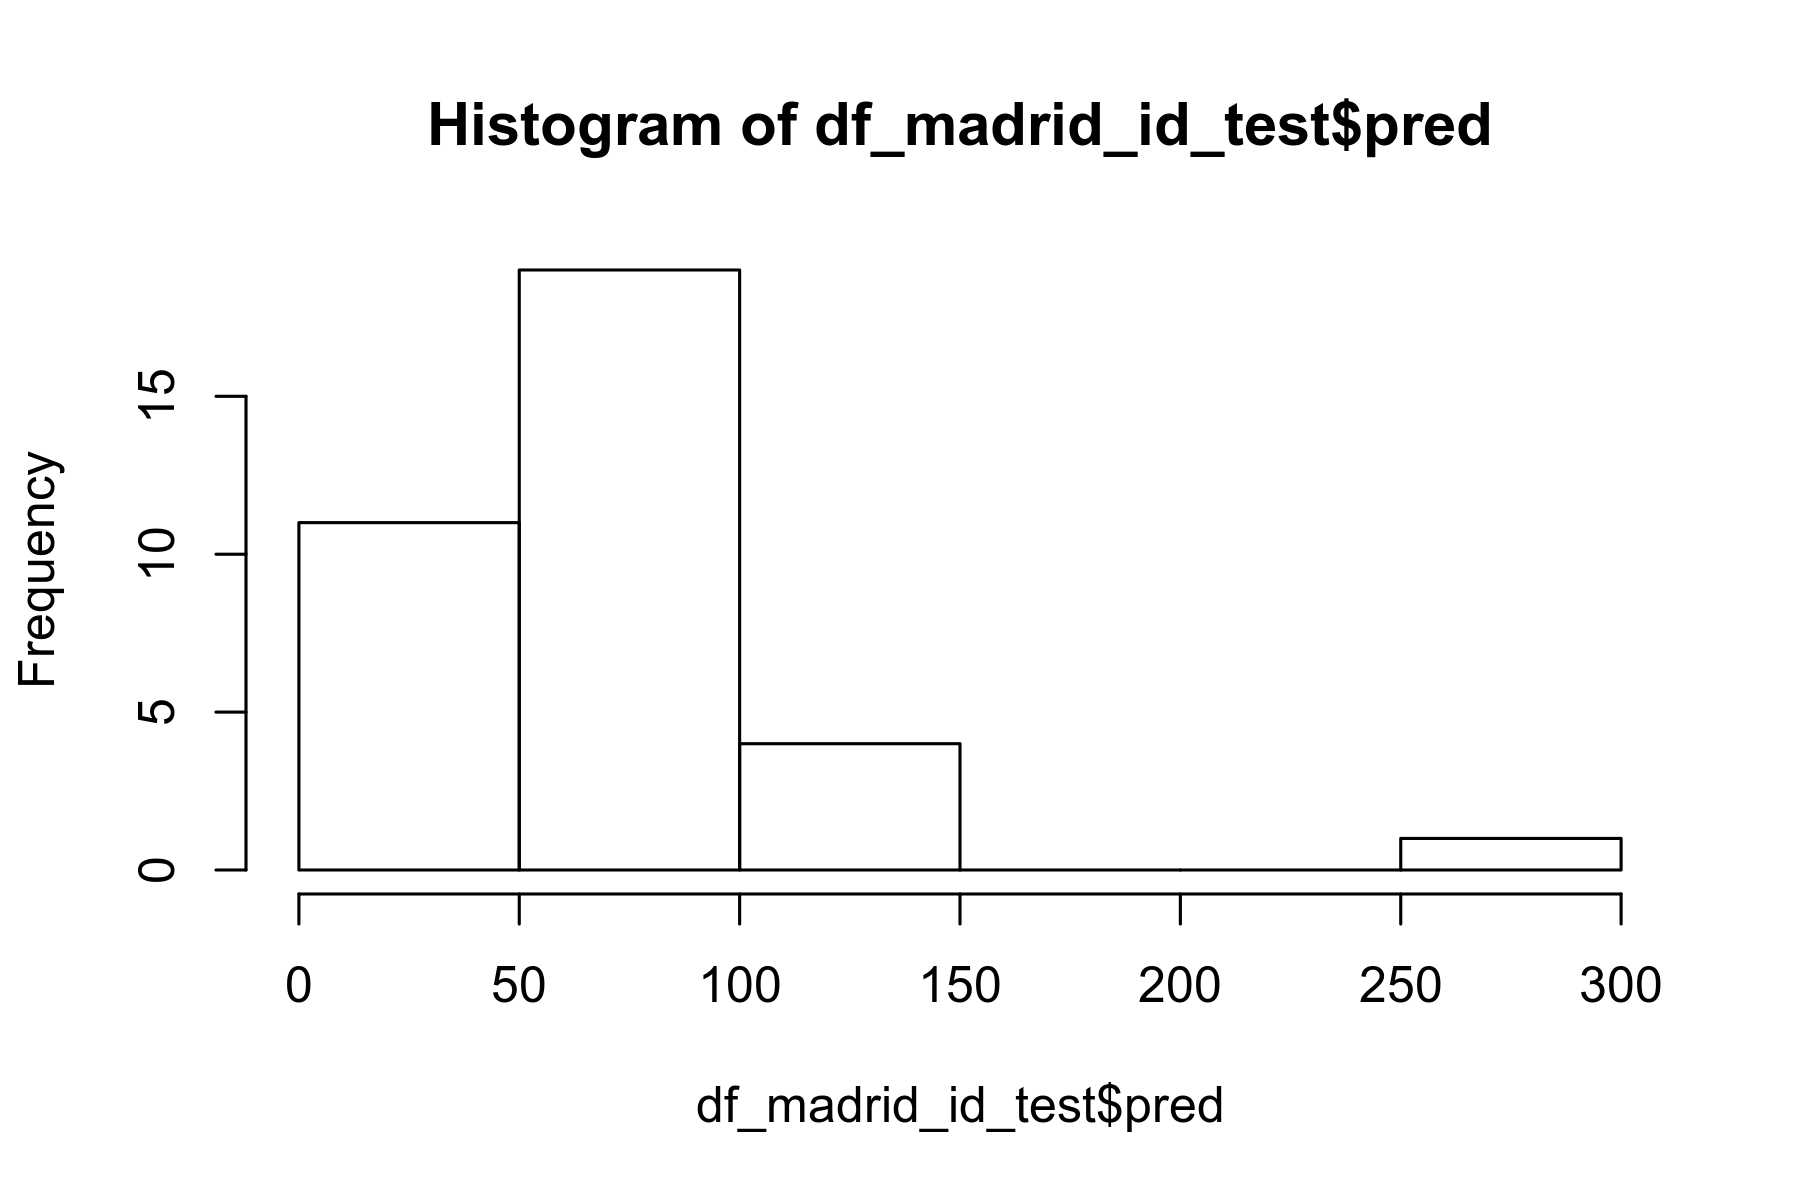

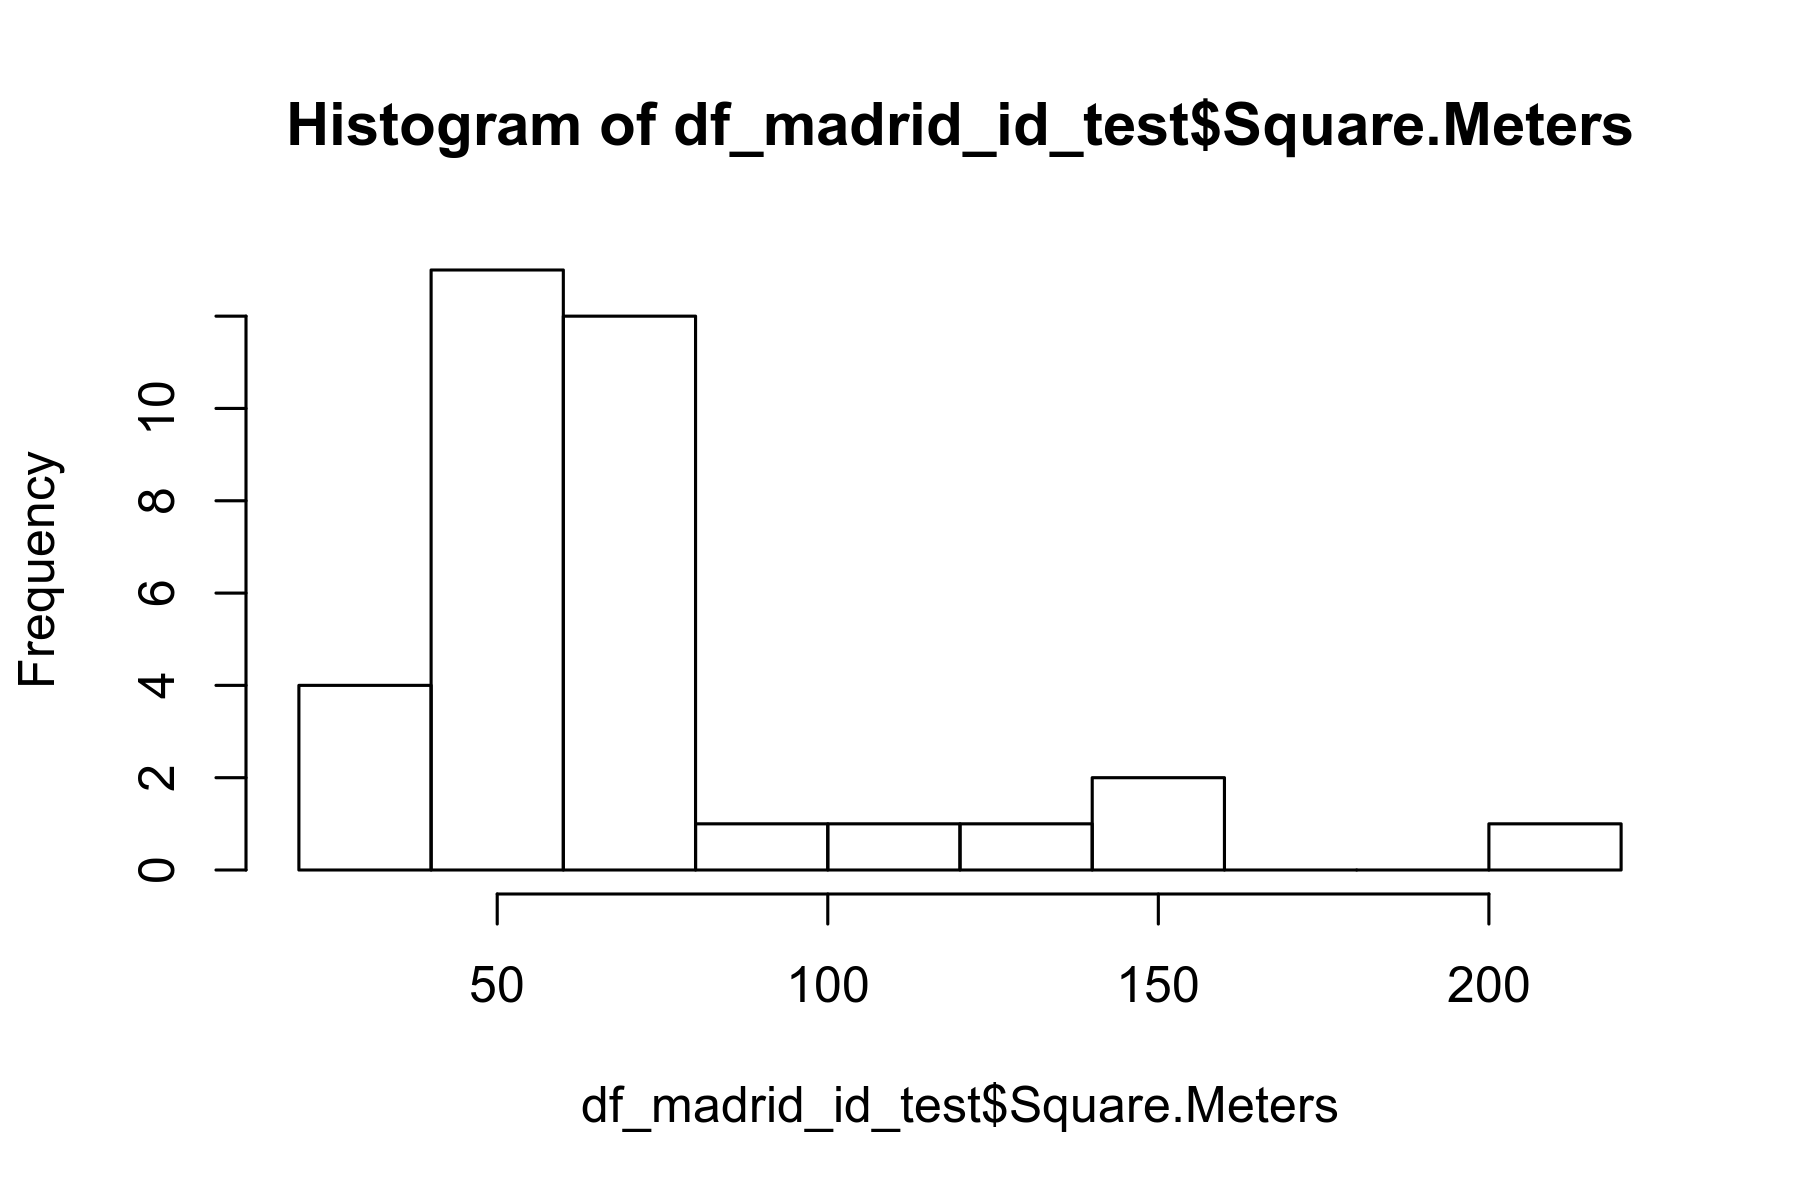

In [36]:
hist(df_madrid_id_test$pred)
hist(df_madrid_id_test$Square.Meters)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [37]:
# Primero busco el neighb_id del barrio de Sol:
neighbourhood_id_sol<-df_barrios %>% filter(names=="Sol") %>% select(neighbourhood_id)
# Genero un dataframe para elaborar la predicción
df_appartment<-data.frame(neighbourhood_id=neighbourhood_id_sol,Bedrooms=3,Price=80,Accommodates=6)
# Predicción según el modelo
pred_m2<-predict(model,df_appartment)
paste("El apartamento buscado deberá tener, según el modelo predictivo,",round(pred_m2),"metros cuadrados")

[1] "El apartamento buscado deberá tener, según el modelo predictivo, 106 metros cuadrados"

In [38]:
cf<-coefficients(model)
cf_bedroom_sol<-cf['Bedrooms']
paste("El tamaño que aumenta el apartamento por dormitorio según los datos es de :",round(cf_bedroom_sol,2),"metros cuadrados")

[1] "El tamaño que aumenta el apartamento por dormitorio según los datos es de : 24.81 metros cuadrados"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [39]:
#Actualizo el dataframe original con los valores del predict
df_madrid_id_all <- df_madrid %>% inner_join(df_barrios,by=c("Neighbourhood"='names')) 

df_madrid_id_all$Square.Meters[is.na(df_madrid_id_all$Square.Meters)]<-
 round(predict(model,df_madrid_id_all[is.na(df_madrid_id_all$Square.Meters),]))

head(df_madrid_id_all)

Warning message:
“Column `Neighbourhood`/`names` joining factors with different levels, coercing to character vector”

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighbourhood_id
Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,50,Neighbourhood_id_1
Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,53,Neighbourhood_id_1
Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,110,Neighbourhood_id_1
La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,49,Neighbourhood_id_1
Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,46,Neighbourhood_id_1
Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,23,Neighbourhood_id_1


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [40]:
#Prescindo de latitud y longitud ya que no son importantes para lo que queremos desarrollar
df_madrid_pca<-na.omit(df_madrid_id_all[,c("Beds","Price","Review.Scores.Rating","Square.Meters",'neighbourhood_id', "Accommodates","Bathrooms","Bedrooms")])

pca_df<-prcomp(df_madrid_pca %>% select(-neighbourhood_id),center = TRUE, scale. = TRUE)

In [41]:
summary(df_madrid_pca)

      Beds            Price        Review.Scores.Rating Square.Meters   
 Min.   : 1.000   Min.   : 18.00   Min.   : 20.00       Min.   : 20.00  
 1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 88.00       1st Qu.: 48.00  
 Median : 2.000   Median : 74.00   Median : 93.00       Median : 52.00  
 Mean   : 2.384   Mean   : 87.17   Mean   : 91.44       Mean   : 64.07  
 3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 97.00       3rd Qu.: 76.00  
 Max.   :16.000   Max.   :800.00   Max.   :100.00       Max.   :480.03  
           neighbourhood_id  Accommodates      Bathrooms       Bedrooms    
 Neighbourhood_id_1:3482    Min.   : 1.000   Min.   :0.00   Min.   :0.000  
 Neighbourhood_id_2: 648    1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000  
 Neighbourhood_id_3:  57    Median : 4.000   Median :1.00   Median :1.000  
                            Mean   : 4.127   Mean   :1.24   Mean   :1.417  
                            3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000  
                            Max. 

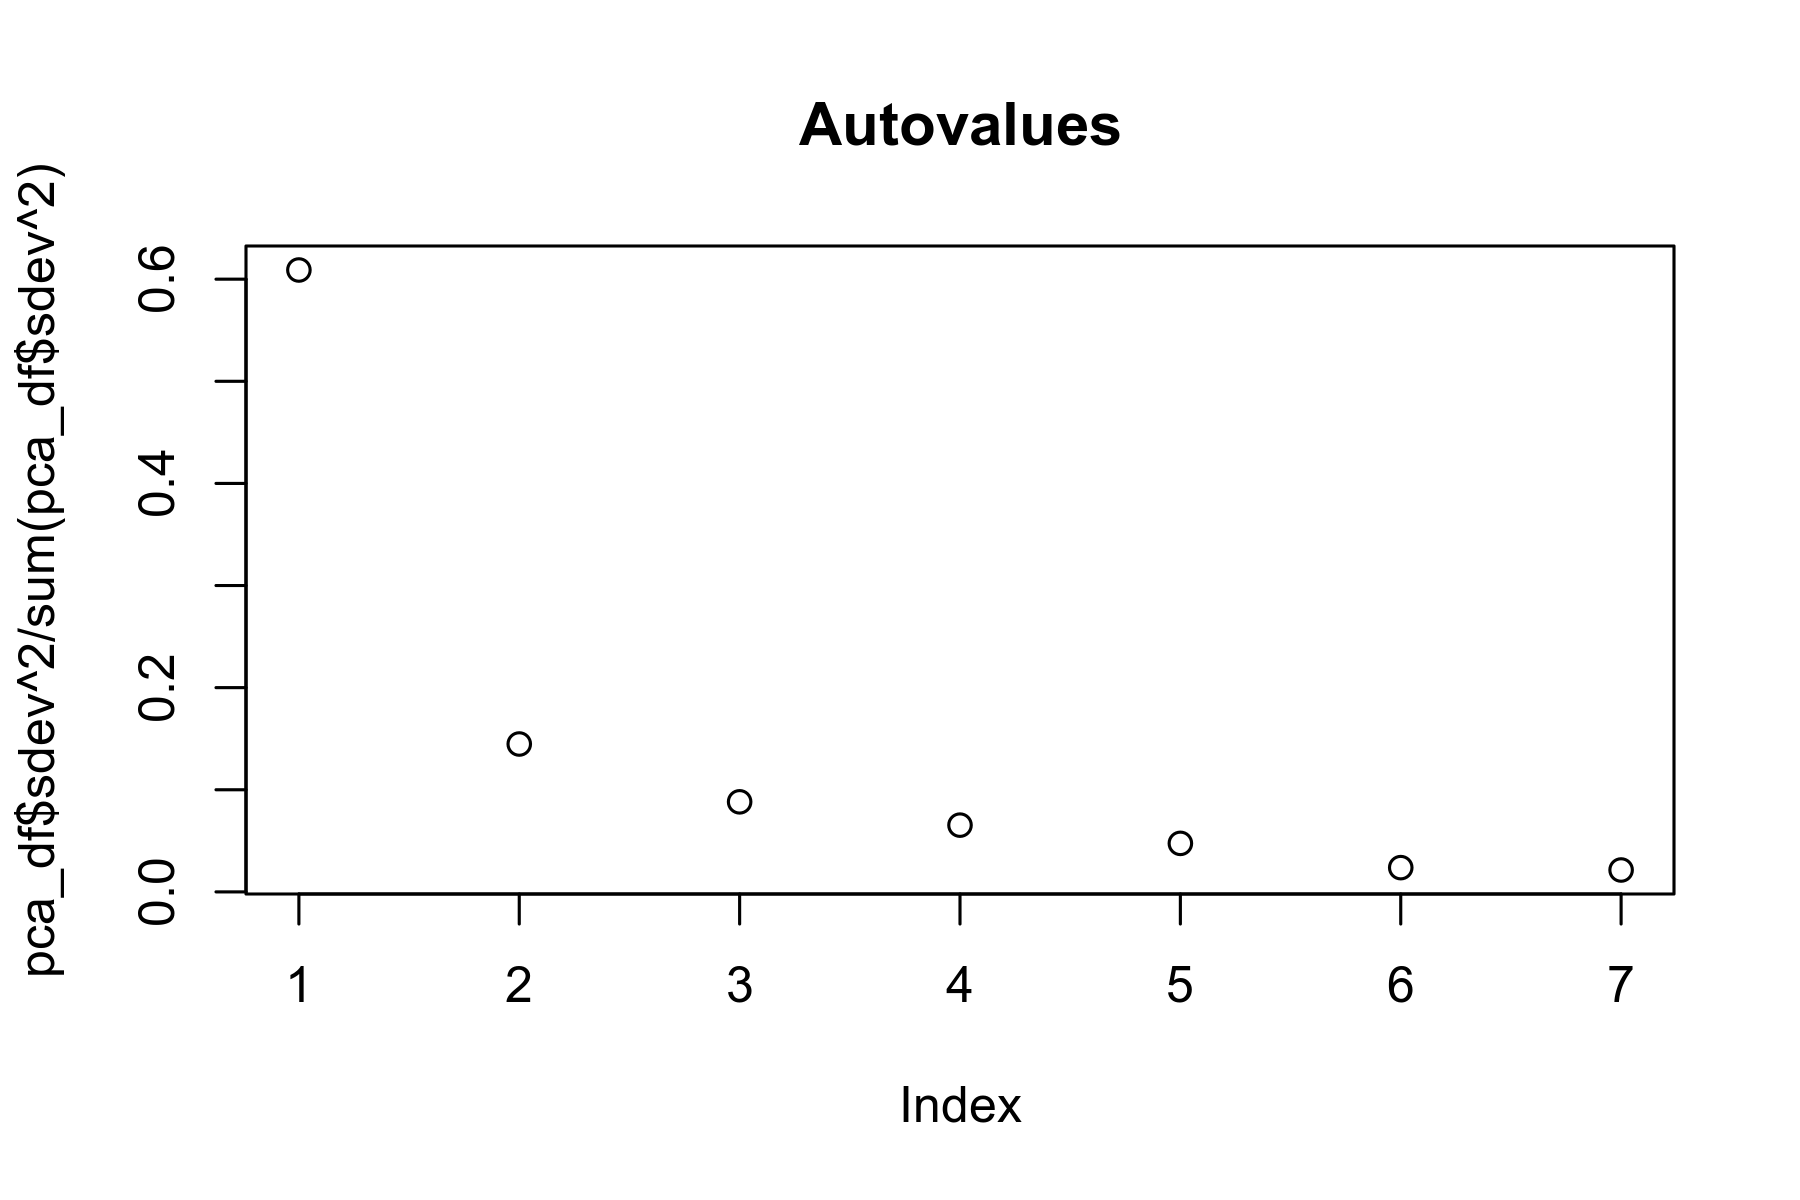

In [42]:
plot(pca_df$sdev^2/sum(pca_df$sdev^2),main="Autovalues")

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [43]:
neighbourhood_pca<-cbind(data.frame(pca_df$x),neighbourhood_id=df_madrid_pca$neighbourhood_id)

El hecho de clusterizar por Metros Cuadrados da especial importancia a las variables que directa o indirectamente hacen referencia al tamaño

El paquete MASS nos proporciona información sobre los PCAs generados clave para averiguar cuáles son los más importantes

In [44]:
MASS::lda(formula=neighbourhood_id~.,data=neighbourhood_pca)

Call:
lda(neighbourhood_id ~ ., data = neighbourhood_pca)

Prior probabilities of groups:
Neighbourhood_id_1 Neighbourhood_id_2 Neighbourhood_id_3 
        0.83162169         0.15476475         0.01361357 

Group means:
                          PC1          PC2          PC3         PC4         PC5
Neighbourhood_id_1 -0.1254834  0.001446507  0.001544132 -0.05102768 -0.00484023
Neighbourhood_id_2  0.4426542  0.018035522 -0.015593612 -0.01963990  0.04553364
Neighbourhood_id_3  2.6332125 -0.293399203  0.082947228  3.34043933 -0.22196696
                           PC6         PC7
Neighbourhood_id_1  0.04428556  0.03926876
Neighbourhood_id_2 -0.05719733 -0.08396270
Neighbourhood_id_3 -2.05506021 -1.44431586

Coefficients of linear discriminants:
            LD1        LD2
PC1  0.29547744 -0.3123890
PC2 -0.12341049 -0.0887019
PC3  0.05344528  0.1013337
PC4  3.20487801  0.8015200
PC5 -0.26292561 -0.5439183
PC6 -5.52229573  0.1172970
PC7 -4.36788881  1.1239571

Proportion of trace:
   LD1    L

Compruebo que los PC4 y PC7 son los coeficientes más relevantes en los indicadores LD1 y LD2

Asímismo la última línea de la celda anterior muestra la mayor importancia de los coeficientes LD1 y LD2 en clasificar por neighbourhood_id

In [48]:
pca_cols<-colnames(neighbourhood_pca)[1:ncol(neighbourhood_pca)-1]
df_val<-data.frame(pca=pca_cols,F=NA)
for (idx in (1:nrow(df_val))){
    formula<-paste(pca_cols[idx],"~ neighbourhood_id")
    df_val$F[idx]<-oneway.test(neighbourhood_pca,formula = as.formula(formula))$statistic
}
df_val

pca,F
PC1,45.3716026
PC2,1.2574891
PC3,0.3217377
PC4,649.0243218
PC5,4.8958157
PC6,312.5339579
PC7,383.0161415


El test de ANOVA confirma las hipótesis planteadas sobre la importancia de Bathrooms y Square Meters , así como Accomodates